<a href="https://colab.research.google.com/github/Yazdan-Lotfi-Pour-1996/Yazdan-Lotfi-Pour-1996/blob/main/Untitled12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



In this notebook, I am exploring the development of a model based on new AI-driven approaches. I am fully aware that I am embarking on an unpredictable and lengthy journey, but I am excited to open a new window for other researchers, enabling them to build upon and advance this work.

The content of this notebook may appear disorganized, as I have aimed to present an original path—one that is inevitably filled with errors and mistakes. I believe this reflects the true nature of research. Ultimately, we reach a reliable goal and meaningful results, fortunately. Please feel free to use this work and approach it with peace of mind.

For further information:

Lotfipour Yazdan  
solotfypour17@gmail.com


In [ ]:
# Required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np




# Load your dataset
df = pd.read_csv("Final_Cold_Plasma_Data_300.csv")

# Select inputs and target
features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'E_field (V/cm)']
target = 'ne (cm^-3)'

# Encode categorical gas composition
df_encoded = pd.get_dummies(df, columns=['Gas_Composition'])

# Scale features
scaler = MinMaxScaler()
X = scaler.fit_transform(df_encoded[features + [col for col in df_encoded.columns if 'Gas_Composition_' in col]])
y = df_encoded[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
# Evaluation
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



R² Score: 1.0
RMSE: 5544.410709316207


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# فرض: مدل شما آموزش دیده با:
# rf_multi_model = MultiOutputRegressor(RandomForestRegressor(...)).fit(X_train, y_train)

# لیست نام ویژگی‌ها
# مستقیماً نام‌گذاری دستی
feature_names = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
                 'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']


# استخراج اهمیت ویژگی برای هر خروجی
importance_dict = {}
for i, target in enumerate(y_train.columns):
    rf = rf_multi_model.estimators_[i]
    importances = rf.feature_importances_
    importance_dict[target] = dict(zip(feature_names, importances))

# ساخت جدول نهایی
importance_df = pd.DataFrame(importance_dict).T
importance_df = importance_df[feature_names]  # اطمینان از ترتیب
importance_df = importance_df.round(4)

# نمایش جدول
display(importance_df)

# 📊 نمودار Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(importance_df, annot=True, cmap="viridis")
plt.title("Feature Importance for Each Plasma Output")
plt.xlabel("Input Features")
plt.ylabel("Predicted Outputs")
plt.tight_layout()
plt.show()


AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_clean = imputer.fit_transform(X_train)
y_train_clean = imputer.fit_transform(y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Te (eV)' 'Ion_Pos_Density (cm^-3)' 'Ion_Neg_Density (cm^-3)'
 'O_density (cm^-3)' 'H_density (cm^-3)' 'H2O2_density (cm^-3)'
 'Ar_metastable_density (cm^-3)']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd

# تبدیل به DataFrame برای بررسی دقیق‌تر
X_train_df = pd.DataFrame(X_train, columns=[
    'X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
    'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)'
])

y_train_df = pd.DataFrame(y_train, columns=[
    'ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
    'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)'
])

# نمایش تعداد NaN در هر ستون
print("🔍 Missing values in X:")
print(X_train_df.isna().sum())

print("\n🔍 Missing values in y:")
print(y_train_df.isna().sum())


ValueError: Shape of passed values is (6480, 9), indices imply (6480, 7)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# مدل چندخروجی Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_multi_model = MultiOutputRegressor(rf_model)

# آموزش مدل
rf_multi_model.fit(X_train, y_train)


ValueError: Input contains NaN

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# اگر X_train به صورت numpy array است:
feature_names = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
                 'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']

# اگر y_train به صورت numpy array است:
target_names = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
                'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

# اطمینان از اینکه y_train به شکل DataFrame باشد
y_train = pd.DataFrame(y_train, columns=target_names)

# استخراج اهمیت ویژگی برای هر خروجی
importance_dict = {}
for i, target in enumerate(target_names):
    rf = rf_multi_model.estimators_[i]
    importances = rf.feature_importances_
    importance_dict[target] = dict(zip(feature_names, importances))

# ساخت جدول نهایی
importance_df = pd.DataFrame(importance_dict).T[feature_names]
importance_df = importance_df.round(4)

# نمایش جدول
display(importance_df)

# 📊 رسم Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(importance_df, annot=True, cmap="viridis", linewidths=0.5)
plt.title("🔍 Feature Importance for All Plasma Outputs")
plt.xlabel("Input Features")
plt.ylabel("Predicted Plasma Properties")
plt.tight_layout()
plt.show()



NameError: name 'rf_multi_model' is not defined

In [ ]:

X_feature_names = [
    'X (mm)', 'Z (mm)', 'Voltage (kV)',
    'Gas_Flow (L/min)', 'Frequency (kHz)',
    'Gas_Composition', 'E_field (V/cm)'
]


In [ ]:
X = data[X_feature_names].values
y = data[y_feature_names].values


In [ ]:
# 📦 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# ✅ 2. فرض: X و y داده‌های شما هستند، اگر فایل CSV دارید بخوانید با pd.read_csv()

# نام‌گذاری ویژگی‌ها (9 ستون ورودی)
X_feature_names = [
    'X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
    'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)',
    'Power (W)', 'Pressure (Torr)'
]

# نام خروجی‌ها
y_feature_names = [
    'ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
    'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)'
]

# فرض بر این که X و y به صورت numpy arrays آماده‌اند
# (اگر نه، باید آن‌ها را از فایل CSV یا اکسل بخوانید)

# 🧹 3. پاک‌سازی داده: حذف یا ایمپیوتر
X_df = pd.DataFrame(X, columns=X_feature_names)

y_df = pd.DataFrame(y, columns=y_feature_names)

# حذف سطرهایی که شامل NaN هستند
X_df_clean = X_df.dropna()
y_df_clean = y_df.loc[X_df_clean.index].dropna()

# تبدیل مجدد به numpy
X_clean = X_df_clean.values
y_clean = y_df_clean.values

# ✂️ 4. تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# 🔁 5. آموزش مدل MultiOutput Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_multi = MultiOutputRegressor(rf)
rf_multi.fit(X_train, y_train)

# 🔍 6. ارزیابی مدل
y_pred = rf_multi.predict(X_test)
print("📊 R2 Score:", r2_score(y_test, y_pred))
print("📉 RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# 📈 7. ترسیم مقایسه خروجی‌ها (مثال برای ne)
plt.figure(figsize=(6,4))
plt.scatter(y_test[:,0], y_pred[:,0], alpha=0.5, label="ne (cm^-3)")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("True vs Predicted: ne (cm^-3)")
plt.plot([min(y_test[:,0]), max(y_test[:,0])], [min(y_test[:,0]), max(y_test[:,0])], 'r--')
plt.legend()
plt.grid(True)
plt.show()

# ⭐ 8. Feature Importance برای هر خروجی
importances_dict = {}

for i, target in enumerate(y_feature_names):
    rf_model = rf_multi.estimators_[i]
    importances = rf_model.feature_importances_
    importances_dict[target] = dict(zip(X_feature_names, importances))

# 🖨️ چاپ اهمیت ویژگی‌ها
for target, feats in importances_dict.items():
    print(f"\n📌 Feature Importance for: {target}")
    sorted_feats = sorted(feats.items(), key=lambda x: x[1], reverse=True)
    for feat, score in sorted_feats:
        print(f"{feat:<25} : {score:.4f}")


ValueError: Shape of passed values is (8100, 7), indices imply (8100, 9)

In [ ]:
print(data.columns.tolist())


['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)', 'ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)', 'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']


In [ ]:
import pandas as pd
import numpy as np

# بارگذاری داده
data = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# تعریف نام‌ها
X_feature_names = [
    'X (mm)', 'Z (mm)', 'Voltage (kV)',
    'Gas_Flow (L/min)', 'Frequency (kHz)',
    'Gas_Composition', 'E_field (V/cm)'
]

y_feature_names = [
    'ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)',
    'Ion_Neg_Density (cm^-3)', 'O_density (cm^-3)',
    'H_density (cm^-3)', 'H2O2_density (cm^-3)',
    'Ar_metastable_density (cm^-3)'
]

# استخراج X و y
X = data[X_feature_names].values
y = data[y_feature_names].values

# ساخت DataFrame برای بررسی و تحلیل آماری
X_df = pd.DataFrame(X, columns=X_feature_names)
y_df = pd.DataFrame(y, columns=y_feature_names)

# نمایش خلاصه آماری
print(X_df.describe())
print(y_df.describe())


        X (mm)  Z (mm)  Voltage (kV)  Gas_Flow (L/min)  Frequency (kHz)  \
count     8100    8100          8100              8100             8100   
unique      15       4             5                 3                3   
top          0       0            10                 4               70   
freq       540    2025          1620              2700             2700   

       Gas_Composition  E_field (V/cm)  
count             8100            8100  
unique               3               5  
top                 Ar             350  
freq              2700            1620  
         ne (cm^-3)      Te (eV)  Ion_Pos_Density (cm^-3)  \
count  8.100000e+03  8100.000000             8.100000e+03   
mean   8.500000e+17     0.230000             6.800000e+17   
std    2.828602e+17     0.070715             2.262881e+17   
min    4.500000e+17     0.130000             3.600000e+17   
25%    6.500000e+17     0.180000             5.200000e+17   
50%    8.500000e+17     0.230000             6.800000

🔍 Model Evaluation:
ne (cm^-3): R² = 1.000 | RMSE = 5646.989
Te (eV): R² = 1.000 | RMSE = 0.000
Ion_Pos_Density (cm^-3): R² = 1.000 | RMSE = 0.000
Ion_Neg_Density (cm^-3): R² = 1.000 | RMSE = 0.000
O_density (cm^-3): R² = 1.000 | RMSE = 0.064
H_density (cm^-3): R² = 1.000 | RMSE = 0.054
H2O2_density (cm^-3): R² = 1.000 | RMSE = 0.016
Ar_metastable_density (cm^-3): R² = 1.000 | RMSE = 0.010


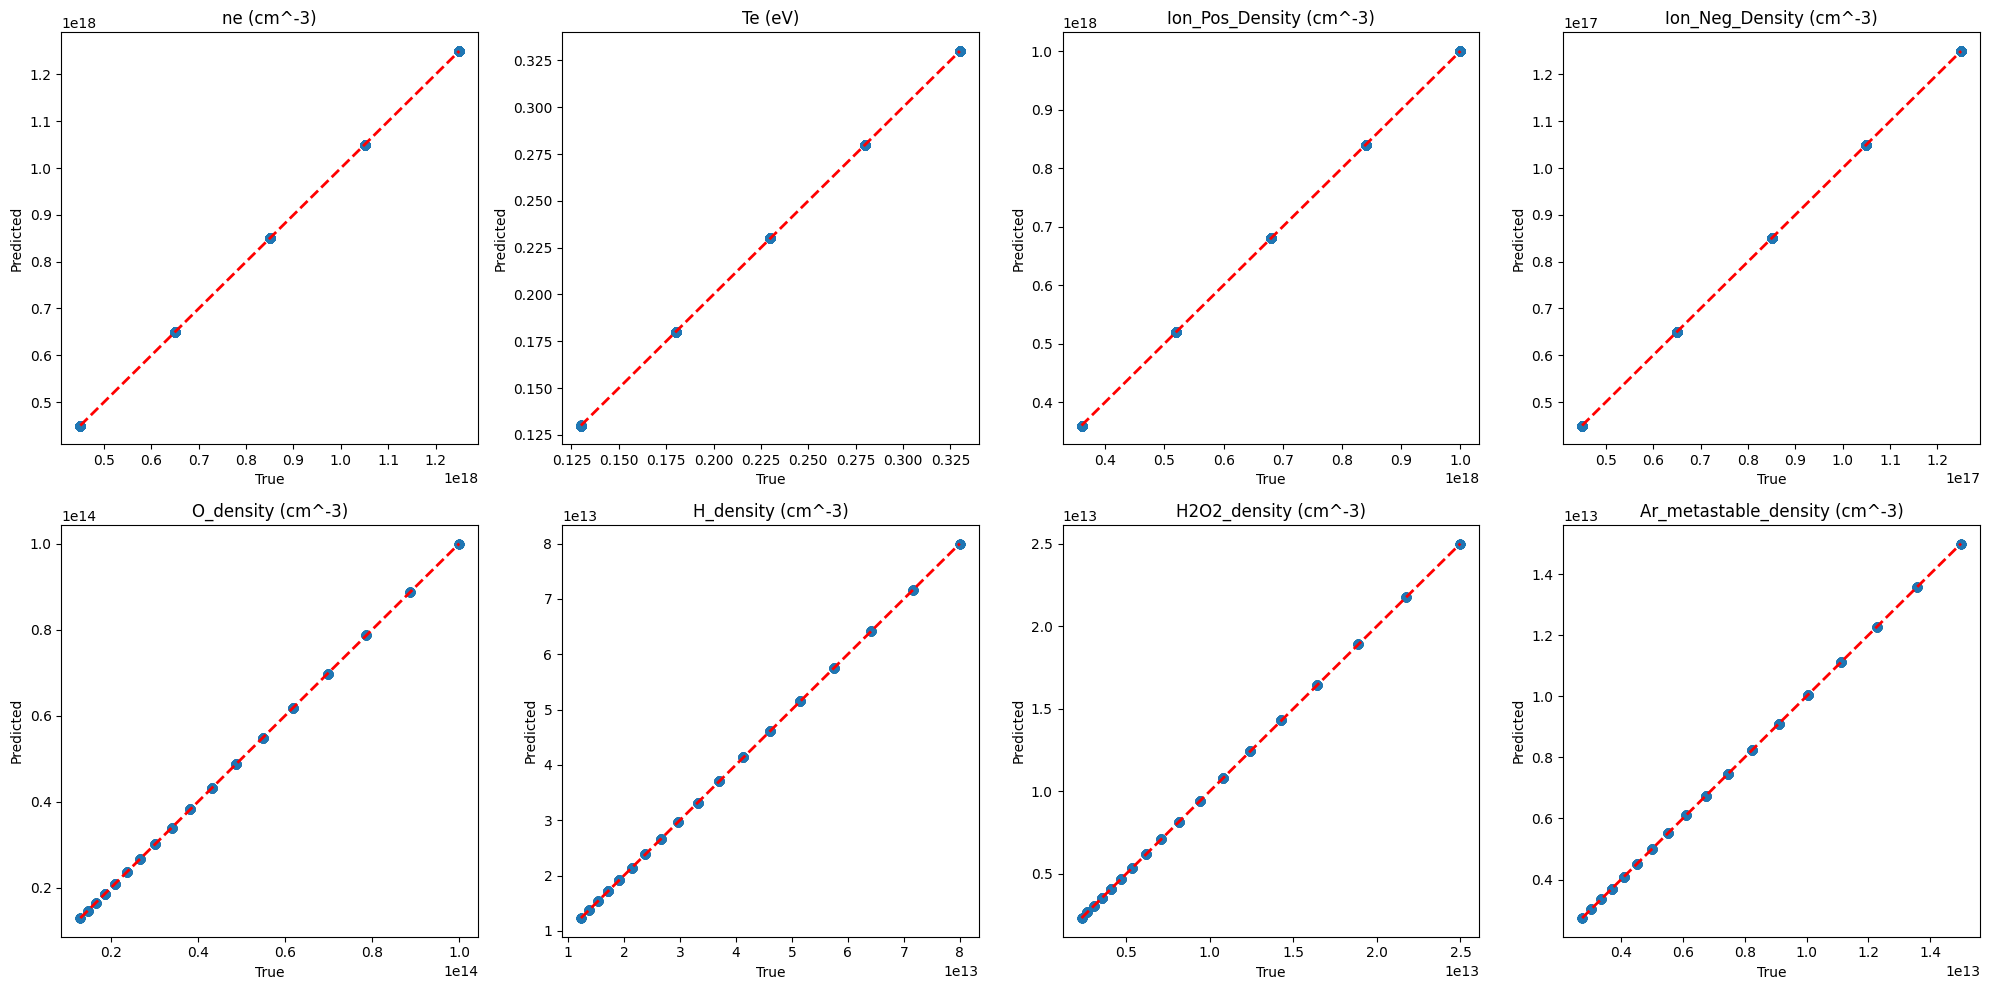


📌 Feature Importances:

ne (cm^-3):
  E_field (V/cm): 0.5165
  Voltage (kV): 0.4835
  X (mm): 0.0000
  Gas_Flow (L/min): 0.0000
  Gas_Composition: 0.0000
  Z (mm): 0.0000
  Frequency (kHz): 0.0000

Te (eV):
  E_field (V/cm): 0.5473
  Voltage (kV): 0.4527
  X (mm): 0.0000
  Frequency (kHz): 0.0000
  Gas_Composition: 0.0000
  Z (mm): 0.0000
  Gas_Flow (L/min): 0.0000

Ion_Pos_Density (cm^-3):
  E_field (V/cm): 0.5172
  Voltage (kV): 0.4828
  X (mm): 0.0000
  Frequency (kHz): 0.0000
  Z (mm): 0.0000
  Gas_Composition: 0.0000
  Gas_Flow (L/min): 0.0000

Ion_Neg_Density (cm^-3):
  E_field (V/cm): 0.5172
  Voltage (kV): 0.4828
  X (mm): 0.0000
  Frequency (kHz): 0.0000
  Z (mm): 0.0000
  Gas_Composition: 0.0000
  Gas_Flow (L/min): 0.0000

O_density (cm^-3):
  X (mm): 0.9193
  Z (mm): 0.0807
  E_field (V/cm): 0.0000
  Voltage (kV): 0.0000
  Frequency (kHz): 0.0000
  Gas_Composition: 0.0000
  Gas_Flow (L/min): 0.0000

H_density (cm^-3):
  X (mm): 0.9225
  Z (mm): 0.0775
  E_field (V/cm): 0.00

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 📥 1. بارگذاری داده
data = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# 📌 2. تعریف ورودی‌ها و خروجی‌ها
X_feature_names = [
    'X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
    'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)'
]

y_feature_names = [
    'ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
    'O_density (cm^-3)', 'H_density (cm^-3)',
    'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)'
]

X = data[X_feature_names]
y = data[y_feature_names]

# 🧹 3. حذف مقادیر گمشده
X = X.dropna()
y = y.loc[X.index]  # همگام‌سازی سطرها
from sklearn.preprocessing import LabelEncoder

# تبدیل مقدار گاز از متن به عدد
le = LabelEncoder()
X['Gas_Composition'] = le.fit_transform(X['Gas_Composition'])

# 🔀 4. تقسیم آموزش/تست
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🧠 5. آموزش مدل Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
multi_rf = MultiOutputRegressor(rf_model)
multi_rf.fit(X_train, y_train)

# 📈 6. پیش‌بینی و ارزیابی
y_pred = multi_rf.predict(X_test)
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))

# 📊 7. نمایش ارزیابی هر خروجی
print("🔍 Model Evaluation:")
for i, name in enumerate(y_feature_names):
    print(f"{name}: R² = {r2[i]:.3f} | RMSE = {rmse[i]:.3f}")

# 📉 8. ترسیم نمودار واقعی vs پیش‌بینی‌شده
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()

for i, name in enumerate(y_feature_names):
    axs[i].scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5)
    axs[i].plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                'r--', linewidth=2)
    axs[i].set_title(f'{name}')
    axs[i].set_xlabel('True')
    axs[i].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# 🔎 9. تحلیل اهمیت ویژگی برای هر خروجی
print("\n📌 Feature Importances:")
for i, name in enumerate(y_feature_names):
    rf = multi_rf.estimators_[i]
    importances = rf.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    print(f"\n{name}:")
    for idx in sorted_idx:
        print(f"  {X_feature_names[idx]}: {importances[idx]:.4f}")


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# مدل چند‌خروجی
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
multi_rf = MultiOutputRegressor(rf_model)

# اجرای cross-validation با 5 فولد و میانگین امتیاز R2
scores = cross_val_score(multi_rf, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", scores)
print("Average R² Score:", np.mean(scores))



Cross-Validation R² Scores: [-1.01412048e+29 -4.05648192e+29  5.00000000e-01 -1.01412048e+29
 -1.01412048e+29]
Average R² Score: -1.4197686722556472e+29


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline

# 1. خواندن داده
df = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# 2. تعریف ورودی‌ها و خروجی‌ها
X_feature_names = [
    'X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
    'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)'
]

y_feature_names = [
    'ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)',
    'Ion_Neg_Density (cm^-3)', 'O_density (cm^-3)',
    'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)'
]

X = df[X_feature_names]
y = df[y_feature_names]

# 3. پیش‌پردازش: OneHotEncoding برای ستون دسته‌ای و Scaling
categorical_features = ['Gas_Composition']
numerical_features = list(set(X_feature_names) - set(categorical_features))

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# 4. تعریف مدل و Pipeline
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_rf = MultiOutputRegressor(rf)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', multi_rf)
])

# 5. کراس‌ولیدیشن برای هر خروجی
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for i, target_name in enumerate(y.columns):
    print(f"\n🔍 Cross-Validation for target: {target_name}")
    scores = cross_val_score(pipeline, X, y[target_name], cv=kf, scoring='r2')
    print("R² Scores:", scores)
    print("Average R²:", np.mean(scores))



🔍 Cross-Validation for target: ne (cm^-3)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/multioutput.py", line 248, in fit
    raise ValueError(
ValueError: y must have at least two dimensions for multi-output regression but has only one.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# استفاده از RandomForest فقط برای یک خروجی
single_target_rf = RandomForestRegressor(n_estimators=100, random_state=42)

pipeline_single = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', single_target_rf)
])

# حالا کراس‌ولیدیشن برای هر خروجی به صورت جداگانه
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for target_name in y.columns:
    print(f"\n🔍 Cross-Validation for target: {target_name}")
    scores = cross_val_score(pipeline_single, X, y[target_name], cv=kf, scoring='r2')
    print("R² Scores:", scores)
    print("Average R²:", np.mean(scores))



🔍 Cross-Validation for target: ne (cm^-3)
R² Scores: [1. 1. 1. 1. 1.]
Average R²: 1.0

🔍 Cross-Validation for target: Te (eV)
R² Scores: [1. 1. 1. 1. 1.]
Average R²: 1.0

🔍 Cross-Validation for target: Ion_Pos_Density (cm^-3)
R² Scores: [1. 1. 1. 1. 1.]
Average R²: 1.0

🔍 Cross-Validation for target: Ion_Neg_Density (cm^-3)
R² Scores: [1. 1. 1. 1. 1.]
Average R²: 1.0

🔍 Cross-Validation for target: O_density (cm^-3)
R² Scores: [1. 1. 1. 1. 1.]
Average R²: 1.0

🔍 Cross-Validation for target: H_density (cm^-3)
R² Scores: [1. 1. 1. 1. 1.]
Average R²: 1.0

🔍 Cross-Validation for target: H2O2_density (cm^-3)
R² Scores: [1. 1. 1. 1. 1.]
Average R²: 1.0

🔍 Cross-Validation for target: Ar_metastable_density (cm^-3)
R² Scores: [1. 1. 1. 1. 1.]
Average R²: 1.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. بارگذاری داده
data = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# 2. مشخص کردن نام ویژگی‌ها و خروجی‌ها
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
              'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']

y_targets = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
             'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

X = data[X_features]
y = data[y_targets]

# 3. ساخت pipeline برای کدگذاری ویژگی اسمی
categorical_features = ['Gas_Composition']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)],
    remainder='passthrough'  # عددی‌ها را تغییر نمی‌دهد
)

# 4. تعریف مدل پایه و MultiOutput
base_model = RandomForestRegressor(n_estimators=100, random_state=42)
multi_model = MultiOutputRegressor(base_model)

# 5. ساخت pipeline کامل شامل پیش‌پردازش و مدل
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', multi_model)
])

# 6. اجرای Cross-Validation برای همه خروجی‌ها
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, target_name in enumerate(y.columns):
    print(f"\n🔍 Cross-Validation for target: {target_name}")
    scores = cross_val_score(pipeline, X, y[target_name], cv=kf, scoring='r2')
    print("R² Scores:", scores)
    print("Average R²:", np.mean(scores))



🔍 Cross-Validation for target: ne (cm^-3)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/multioutput.py", line 248, in fit
    raise ValueError(
ValueError: y must have at least two dimensions for multi-output regression but has only one.


###اینجا مدل اسلی random forest regression  هستش
**bold text**## **bold text**
---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# 1. بارگذاری داده
df = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# 2. تعیین ورودی‌ها و خروجی‌ها
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']
y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
              'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

X = df[X_features]
y = df[y_features]

# 3. پیش‌پردازش
numeric_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'E_field (V/cm)']
categorical_features = ['Gas_Composition']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. مدل‌سازی با MultiOutput
base_model = RandomForestRegressor(n_estimators=100, random_state=42)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(base_model))
])

# 5. Cross-validation برای کل خروجی‌ها
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("📊 R² Scores across folds:", scores)
print("📈 Average R²:", np.mean(scores))

# 6. آموزش نهایی مدل برای ارزیابی متریک‌ها
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. نمایش متریک‌ها برای هر خروجی
print("\n📉 Evaluation on test set:")
for i, target in enumerate(y.columns):
    r2 = r2_score(y_test[target], y_pred[:, i])
    mse = mean_squared_error(y_test[target], y_pred[:, i])
    rmse = mse ** 0.5
    print(f"{target}: R² = {r2:.4f} | RMSE = {rmse:.4f}")


📊 R² Scores across folds: [1. 1. 1. 1. 1.]
📈 Average R²: 1.0

📉 Evaluation on test set:
ne (cm^-3): R² = 1.0000 | RMSE = 5544.4107
Te (eV): R² = 1.0000 | RMSE = 0.0000
Ion_Pos_Density (cm^-3): R² = 1.0000 | RMSE = 0.0000
Ion_Neg_Density (cm^-3): R² = 1.0000 | RMSE = 0.0000
O_density (cm^-3): R² = 1.0000 | RMSE = 0.0636
H_density (cm^-3): R² = 1.0000 | RMSE = 0.0547
H2O2_density (cm^-3): R² = 1.0000 | RMSE = 0.0159
Ar_metastable_density (cm^-3): R² = 1.0000 | RMSE = 0.0097


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# 📌 1. Load dataset
df = pd.read_csv("/content/Final_Cold_Plasma_Data_300.csv")

# 📌 2. Define input/output features
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
              'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']
y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)',
              'Ion_Neg_Density (cm^-3)', 'O_density (cm^-3)', 'H_density (cm^-3)',
              'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

X = df[X_features]
y = df[y_features]

# 📌 3. Preprocessing steps
numeric_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
                    'Frequency (kHz)', 'E_field (V/cm)']
categorical_features = ['Gas_Composition']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 📌 4. Scale y values
from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

# 📌 5. Define model
rf_base = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(rf_base))
])

# 📌 6. KFold CV and R² per output
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores_per_target = {name: [] for name in y.columns}

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred_scaled = pipeline.predict(X_test)

    y_pred = y_scaler.inverse_transform(y_pred_scaled)
    y_test_original = y_scaler.inverse_transform(y_test)

    for i, col in enumerate(y.columns):
        score = r2_score(y_test_original[:, i], y_pred[:, i])
        r2_scores_per_target[col].append(score)

# 📌 7. Print average R² for each output
average_r2 = {k: np.mean(v) for k, v in r2_scores_per_target.items()}
print("📊 Average R² per output:")
for k, v in average_r2.items():
    print(f"{k}: {v:.4f}")


📊 Average R² per output:
ne (cm^-3): 1.0000
Te (eV): 1.0000
Ion_Pos_Density (cm^-3): 1.0000
Ion_Neg_Density (cm^-3): 1.0000
O_density (cm^-3): 1.0000
H_density (cm^-3): 1.0000
H2O2_density (cm^-3): 1.0000
Ar_metastable_density (cm^-3): 1.0000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# Load your data
df = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# Feature sets
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']

y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
              'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']


X = df[X_features]
y = df[y_features]

# Preprocessing
num_cols = [c for c in X.columns if c != 'Gas Composition']
cat_cols = ['Gas Composition']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

model = Pipeline([
    ('pre', preprocessor),
    ('reg', MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)))
])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 📊 R² و RMSE
print("📊 Evaluation:")
for i, col in enumerate(y.columns):
    r2 = r2_score(y_test[col], y_pred[:, i])
    rmse = mean_squared_error(y_test[col], y_pred[:, i]) ** 0.5
    print(f"{col}: R² = {r2:.4f}, RMSE = {rmse:.4e}")

# 📈 Predicted vs True
plt.figure(figsize=(14, 10))
for i, col in enumerate(y.columns):
    plt.subplot(4, 2, i + 1)
    plt.scatter(y_test[col], y_pred[:, i], alpha=0.6)
    plt.plot([y_test[col].min(), y_test[col].max()], [y_test[col].min(), y_test[col].max()], 'r--')
    plt.title(col)
    plt.xlabel("True")
    plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

# 🧪 Cross-validation
cv_scores = cross_val_score(model, X, y, cv=KFold(5), scoring='r2')
print("\nCross-Validation R² Scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores))

# 🔬 Feature Importance (per output)
rf_model = model.named_steps['reg']
input_names = model.named_steps['pre'].get_feature_names_out()

for i, target in enumerate(y.columns):
    importances = rf_model.estimators_[i].feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    plt.figure()
    plt.barh(np.array(input_names)[sorted_idx], importances[sorted_idx])
    plt.title(f"Feature Importance: {target}")
    plt.tight_layout()
    plt.show()

# 🌡️ PDP for top features (example for ne)
disp = PartialDependenceDisplay.from_estimator(
    rf_model.estimators_[0],
    model.named_steps['pre'].transform(X_train),
    features=[0, 1],
    feature_names=input_names,
    target=0
)
plt.show()

# 🧭 Correlation Heatmap
corr = df[X_features + y_features].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 📉 Residual Analysis
for i, col in enumerate(y.columns):
    residuals = y_test[col] - y_pred[:, i]
    plt.figure()
    sns.histplot(residuals, kde=True)
    plt.title(f"Residuals: {col}")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


ValueError: A given column is not a column of the dataframe

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# دوباره محاسبه‌ی باقی‌مانده‌ها (residuals)
residuals = y_test.values - y_pred

# تنظیمات رسم
sns.set(style='darkgrid', font_scale=1.2)

fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.ravel()

for i, col in enumerate(y.columns):
    sns.histplot(residuals[:, i], kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f"Residual Distribution for {col}")
    axes[i].set_xlabel("Error")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
plt.savefig("Figure_PD_Ar_Metastable.png", dpi=300)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# 1. بارگذاری داده
df = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# 2. تعیین ورودی‌ها و خروجی‌ها
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']
y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
              'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

X = df[X_features]
y = df[y_features]

# 3. پیش‌پردازش
numeric_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'E_field (V/cm)']
categorical_features = ['Gas_Composition']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. مدل‌سازی با MultiOutput و MLPRegressor (تنظیمات بهبود یافته)
base_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    early_stopping=True,
    learning_rate_init=0.001,
    random_state=42
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(base_model))
])

# 5. Cross-validation برای کل خروجی‌ها
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("📊 R² Scores across folds:", scores)
print("📈 Average R²:", np.mean(scores))

# 6. آموزش نهایی مدل برای ارزیابی متریک‌ها و پیش‌بینی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. نمایش متریک‌ها برای هر خروجی
print("\n📉 Evaluation on test set:")
for i, target in enumerate(y.columns):
    r2 = r2_score(y_test[target], y_pred[:, i])
    mse = mean_squared_error(y_test[target], y_pred[:, i])
    rmse = mse ** 0.5
    print(f"{target}: R² = {r2:.4f} | RMSE = {rmse:.4f}")

# 8. ترسیم نمودار مقایسه‌ای
plt.figure(figsize=(16, 12))
for i, target in enumerate(y.columns):
    plt.subplot(4, 2, i+1)
    plt.scatter(y_test[target], y_pred[:, i], alpha=0.6, color='b', edgecolors='k')
    plt.plot([y_test[target].min(), y_test[target].max()], [y_test[target].min(), y_test[target].max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Comparison for {target}')
    plt.grid(True)

plt.tight_layout()
plt.show()


📊 R² Scores across folds: [-5.05201379 -5.14559772 -5.41058107 -5.18192084 -5.36877245]
📈 Average R²: -5.231777174004743

📉 Evaluation on test set:
ne (cm^-3): R² = -8.8156 | RMSE = 888968746412809344.0000
Te (eV): R² = 0.9961 | RMSE = 0.0044
Ion_Pos_Density (cm^-3): R² = -8.8156 | RMSE = 711174997130247040.0000
Ion_Neg_Density (cm^-3): R² = -8.8156 | RMSE = 88896874641278992.0000
O_density (cm^-3): R² = -3.4418 | RMSE = 46842667190314.0078
H_density (cm^-3): R² = -4.0682 | RMSE = 39215216655512.9453
H2O2_density (cm^-3): R² = -2.5660 | RMSE = 10769726601119.1582
Ar_metastable_density (cm^-3): R² = -4.8908 | RMSE = 7714506786283.0361


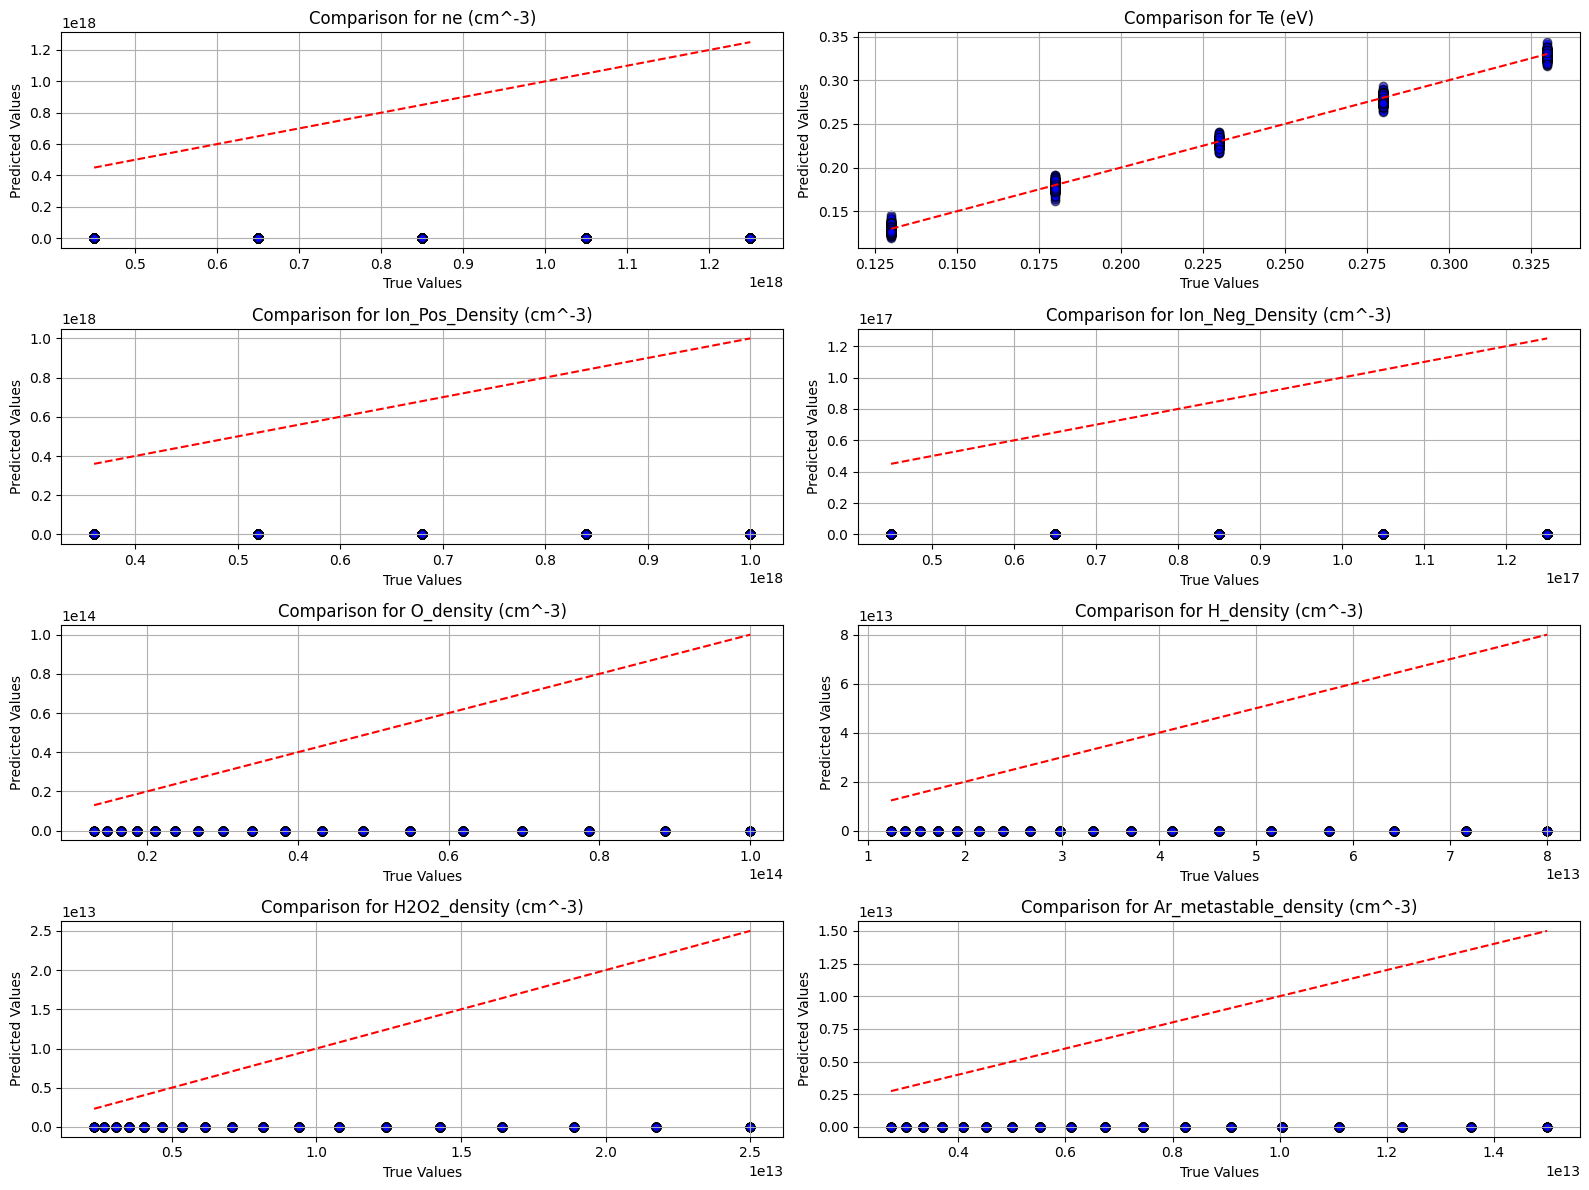

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# 1. بارگذاری داده
df = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# 2. تعیین ورودی‌ها و خروجی‌ها
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']
y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
              'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

X = df[X_features]
y = df[y_features]

# 3. پیش‌پردازش
numeric_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'E_field (V/cm)']
categorical_features = ['Gas_Composition']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. مدل‌سازی با MultiOutput و MLPRegressor (تنظیمات بهبود یافته)
base_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    early_stopping=True,
    learning_rate_init=0.001,
    random_state=42
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(base_model))
])

# 5. Cross-validation برای کل خروجی‌ها
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("📊 R² Scores across folds:", scores)
print("📈 Average R²:", np.mean(scores))

# 6. آموزش نهایی مدل برای ارزیابی متریک‌ها و پیش‌بینی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. نمایش متریک‌ها برای هر خروجی
print("\n📉 Evaluation on test set:")
for i, target in enumerate(y.columns):
    r2 = r2_score(y_test[target], y_pred[:, i])
    mse = mean_squared_error(y_test[target], y_pred[:, i])
    rmse = mse ** 0.5
    print(f"{target}: R² = {r2:.4f} | RMSE = {rmse:.4f}")

# 8. ترسیم نمودار مقایسه‌ای
plt.figure(figsize=(16, 12))
for i, target in enumerate(y.columns):
    plt.subplot(4, 2, i+1)
    plt.scatter(y_test[target], y_pred[:, i], alpha=0.6, color='b', edgecolors='k')
    plt.plot([y_test[target].min(), y_test[target].max()], [y_test[target].min(), y_test[target].max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Comparison for {target}')
    plt.grid(True)

plt.tight_layout()
plt.show()



📉 Evaluation on test set (after output scaling fix):
ne (cm^-3): R² = 0.9995 | RMSE = 6.2545e+15
Te (eV): R² = 0.9995 | RMSE = 1.5636e-03
Ion_Pos_Density (cm^-3): R² = 0.9995 | RMSE = 5.0036e+15
Ion_Neg_Density (cm^-3): R² = 0.9995 | RMSE = 6.2545e+14
O_density (cm^-3): R² = 0.9994 | RMSE = 5.5549e+11
H_density (cm^-3): R² = 0.9994 | RMSE = 4.2137e+11
H2O2_density (cm^-3): R² = 0.9993 | RMSE = 1.4647e+11
Ar_metastable_density (cm^-3): R² = 0.9994 | RMSE = 7.5601e+10


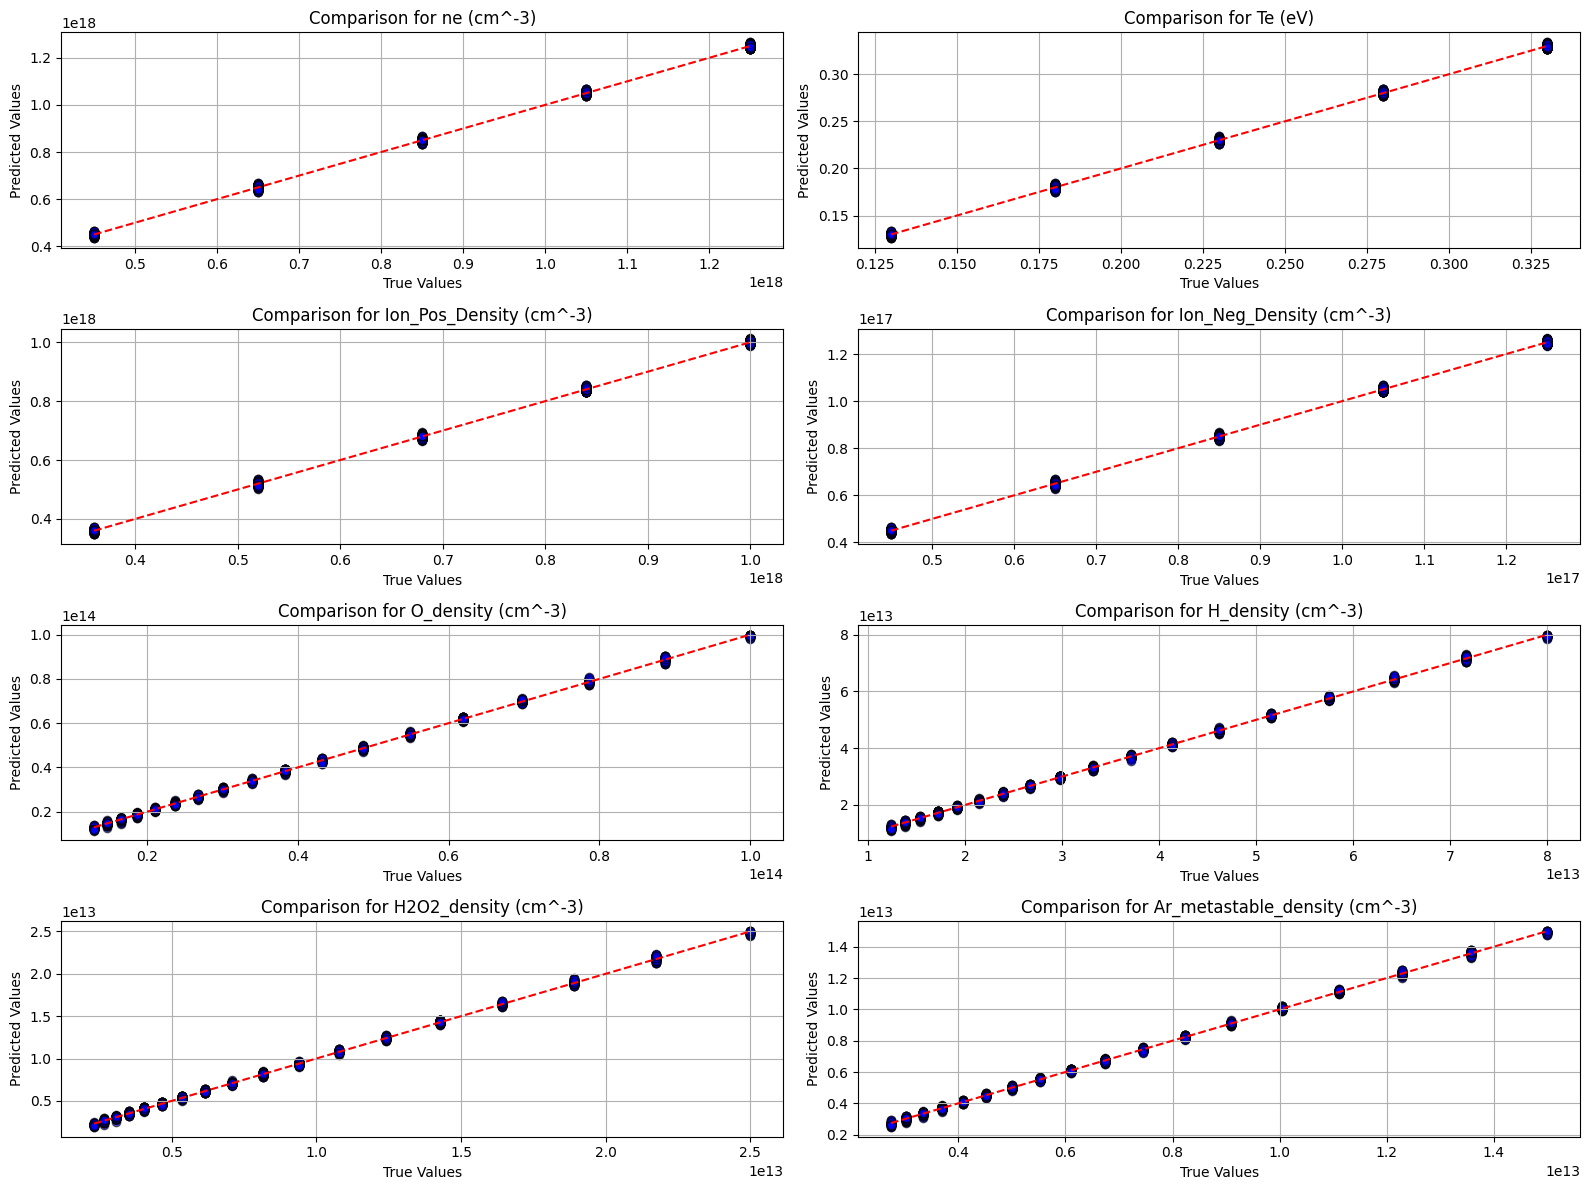

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# 1. بارگذاری داده
df = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# 2. تعیین ورودی‌ها و خروجی‌ها
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']
y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
              'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

X = df[X_features]
y = df[y_features]

# 3. پیش‌پردازش
numeric_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'E_field (V/cm)']
categorical_features = ['Gas_Composition']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. استانداردسازی خروجی‌ها
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

# 5. مدل‌سازی با MLPRegressor
base_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    early_stopping=True,
    learning_rate_init=0.001,
    random_state=42
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(base_model))
])

# 6. تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# 7. آموزش مدل
model.fit(X_train, y_train)

# 8. پیش‌بینی و برگرداندن خروجی‌ها به مقیاس اصلی
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test)

# 9. ارزیابی نهایی
# 9. ارزیابی نهایی
print("\n📉 Evaluation on test set (after output scaling fix):")
for i, target in enumerate(y.columns):
    r2 = r2_score(y_test_original[:, i], y_pred[:, i])
    mse = mean_squared_error(y_test_original[:, i], y_pred[:, i])
    rmse = mse ** 0.5  # دستی حساب کردن RMSE
    print(f"{target}: R² = {r2:.4f} | RMSE = {rmse:.4e}")

# 10. نمودار مقایسه‌ای
plt.figure(figsize=(16, 12))
for i, target in enumerate(y.columns):
    plt.subplot(4, 2, i+1)
    plt.scatter(y_test_original[:, i], y_pred[:, i], alpha=0.6, color='b', edgecolors='k')
    plt.plot([min(y_test_original[:, i]), max(y_test_original[:, i])],
             [min(y_test_original[:, i]), max(y_test_original[:, i])], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Comparison for {target}')
    plt.grid(True)

plt.tight_layout()
plt.show()


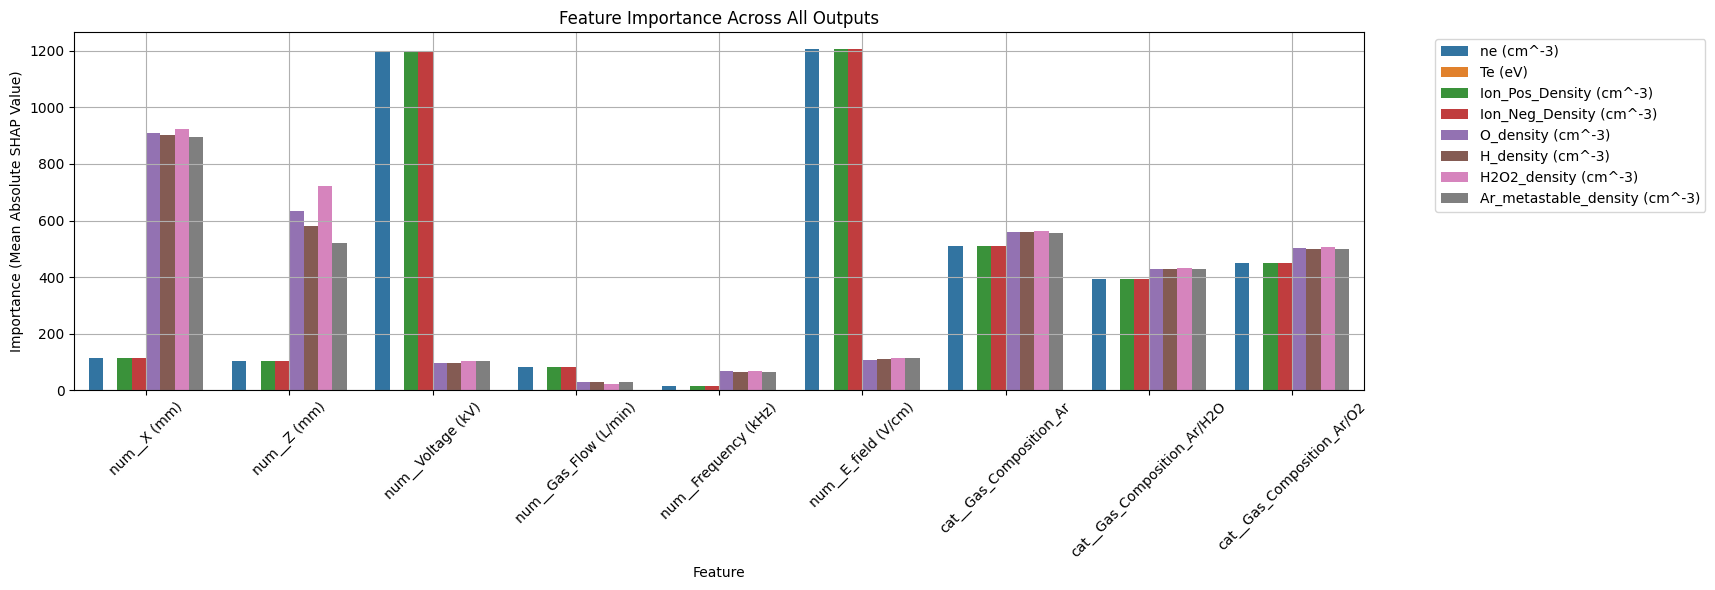

In [ ]:
# 1. کتابخانه‌ها
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor

# 2. بارگذاری داده
df = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# 3. تعریف ورودی و خروجی
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']
y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
              'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']
X = df[X_features]
y = df[y_features]

# 4. پیش‌پردازش
numeric_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'E_field (V/cm)']
categorical_features = ['Gas_Composition']
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 5. مدل‌سازی
base_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, early_stopping=True, random_state=42)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(base_model))
])
model.fit(X, y)

# 6. استخراج مقادیر SHAP
regressor = model.named_steps['regressor']
X_transformed = model.named_steps['preprocessor'].transform(X)
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
feature_importances = {}

for i, target in enumerate(y.columns):
    explainer = shap.Explainer(regressor.estimators_[i].predict, X_transformed)
    shap_values = explainer(X_transformed[:100])  # کم‌تر برای سرعت بیشتر
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    feature_importances[target] = mean_abs_shap

# 7. ترسیم نمودار مجتمع
importances_df_long = pd.DataFrame(feature_importances).T
importances_df_long.columns = feature_names
importances_df_long['Target'] = y.columns
long_df = importances_df_long.melt(id_vars='Target', var_name='Feature', value_name='Importance')

plt.figure(figsize=(14, 6))
sns.barplot(data=long_df, x='Feature', y='Importance', hue='Target', palette='tab10')
plt.title('Feature Importance Across All Outputs')
plt.ylabel('Importance (Mean Absolute SHAP Value)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



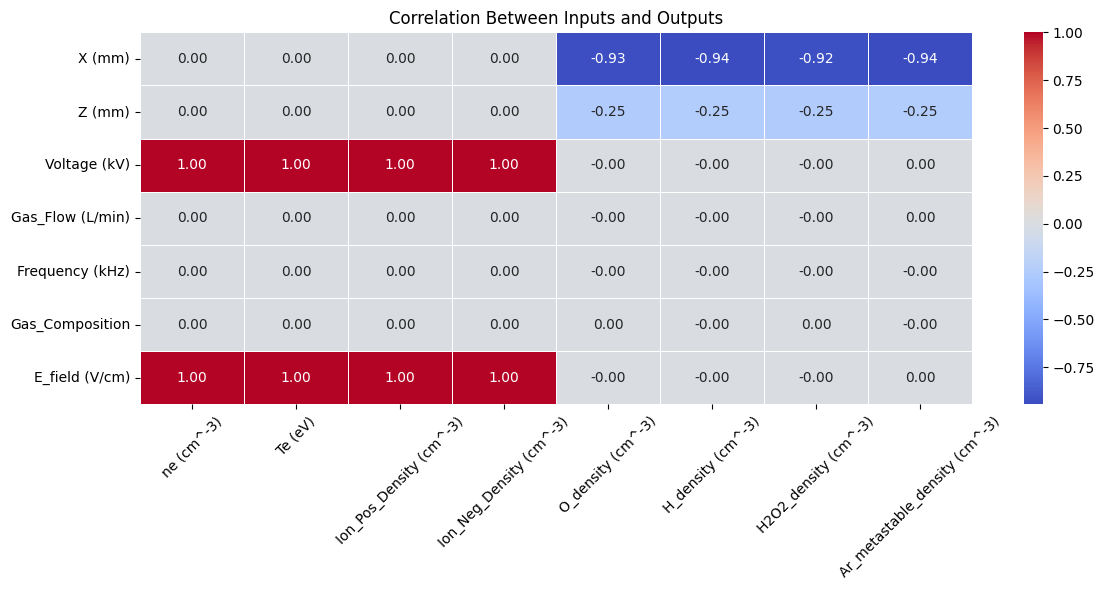

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# بارگذاری داده‌ها (در صورتی که هنوز در حافظه نیست)
df = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# تعریف ورودی‌ها و خروجی‌ها
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
              'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']
y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
              'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

# تبدیل ویژگی Gas_Composition به عددی (برای محاسبه همبستگی)
df_numeric = df[X_features + y_features].copy()
df_numeric['Gas_Composition'] = df['Gas_Composition'].astype('category').cat.codes

# محاسبه ماتریس همبستگی
corr_matrix = df_numeric.corr()

# استخراج فقط زیر ماتریس ورودی‌ها در برابر خروجی‌ها
corr_inputs_outputs = corr_matrix.loc[X_features, y_features]

# رسم heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_inputs_outputs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Inputs and Outputs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


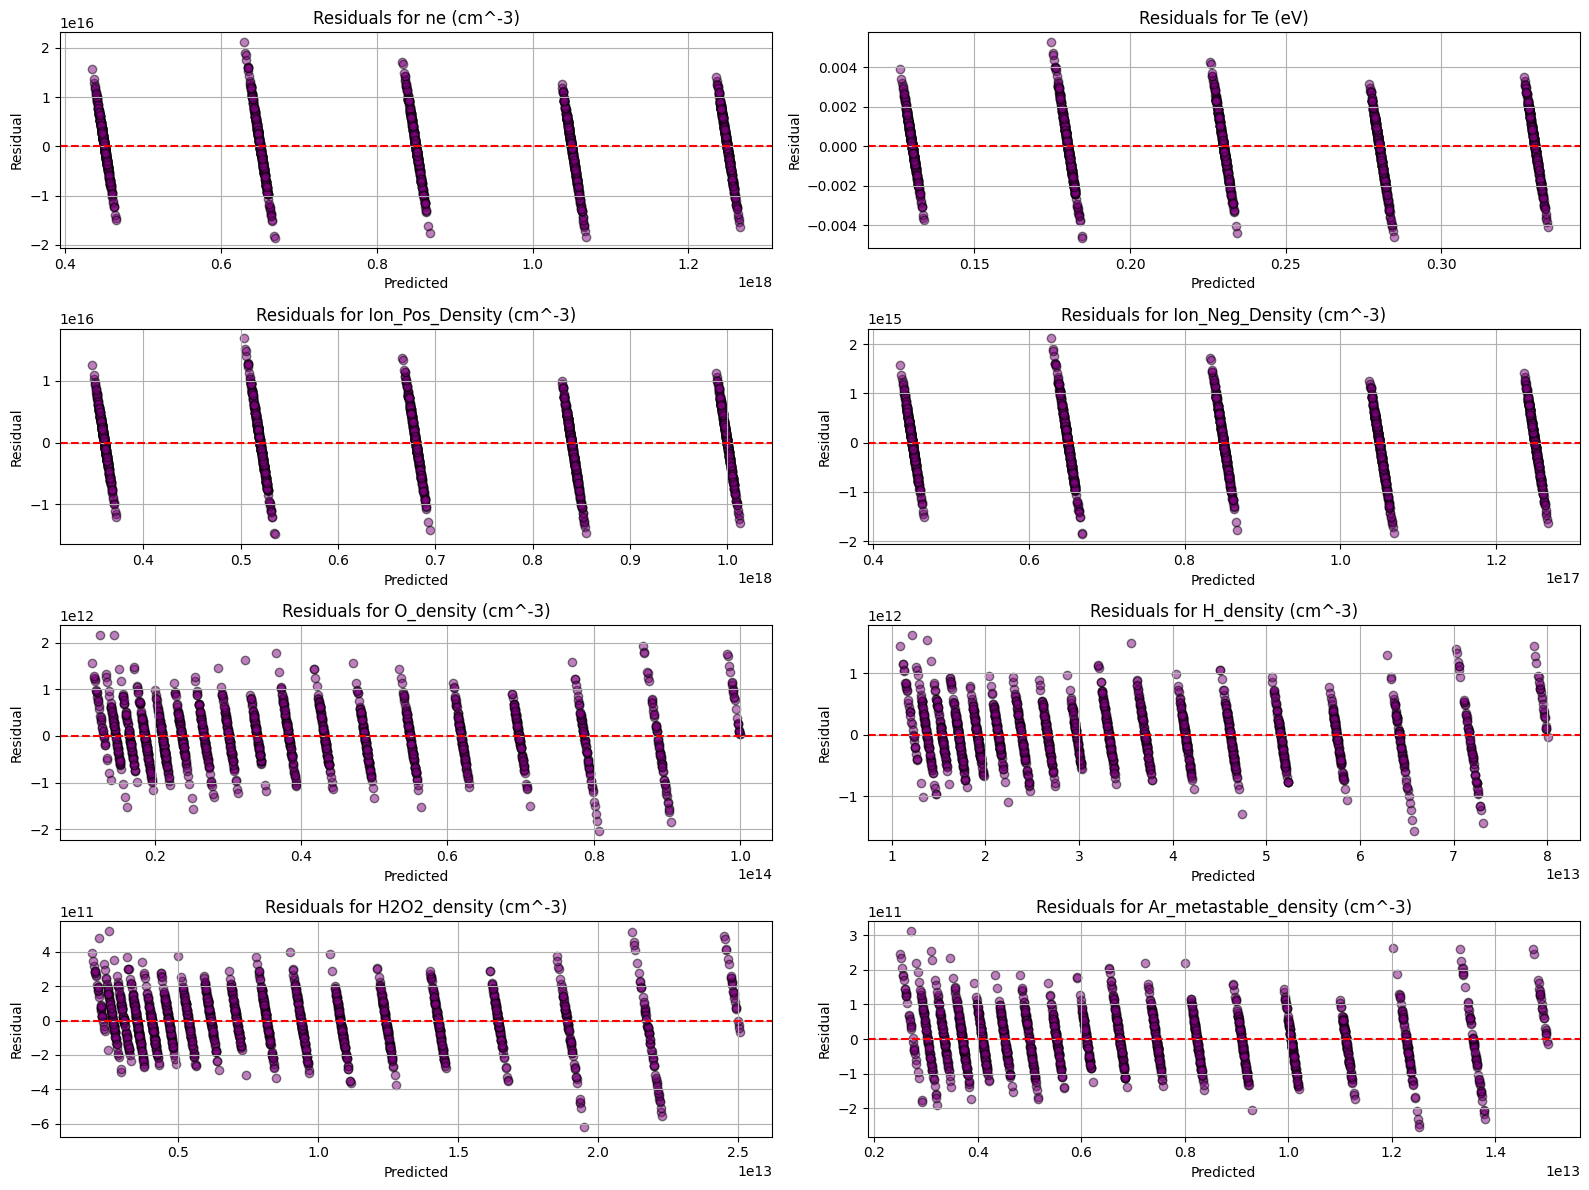

In [ ]:
# 📦 کتابخانه‌ها
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# 📥 بارگذاری داده
df = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# 🎯 تعریف ورودی‌ها و خروجی‌ها
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']
y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)', 'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

X = df[X_features]
y = df[y_features]

# ⚙️ پیش‌پردازش
numeric_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'E_field (V/cm)']
categorical_features = ['Gas_Composition']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 📏 نرمال‌سازی خروجی‌ها
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

# 🧠 مدل MLP
base_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000,
                          early_stopping=True, learning_rate_init=0.001, random_state=42)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(base_model))
])

# 🧪 تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# 🚀 آموزش مدل
model.fit(X_train, y_train)

# 📊 پیش‌بینی و بازگشت خروجی‌ها به مقیاس اصلی
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test)

# ✅ ✅ حالا آماده‌ایم برای تحلیل خطاها (Residuals)

plt.figure(figsize=(16, 12))

for i, target in enumerate(y_features):
    residuals = y_test_original[:, i] - y_pred[:, i]
    plt.subplot(4, 2, i+1)
    plt.scatter(y_pred[:, i], residuals, alpha=0.5, color='purple', edgecolors='k')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.title(f"Residuals for {target}")
    plt.grid(True)

plt.tight_layout()
plt.show()


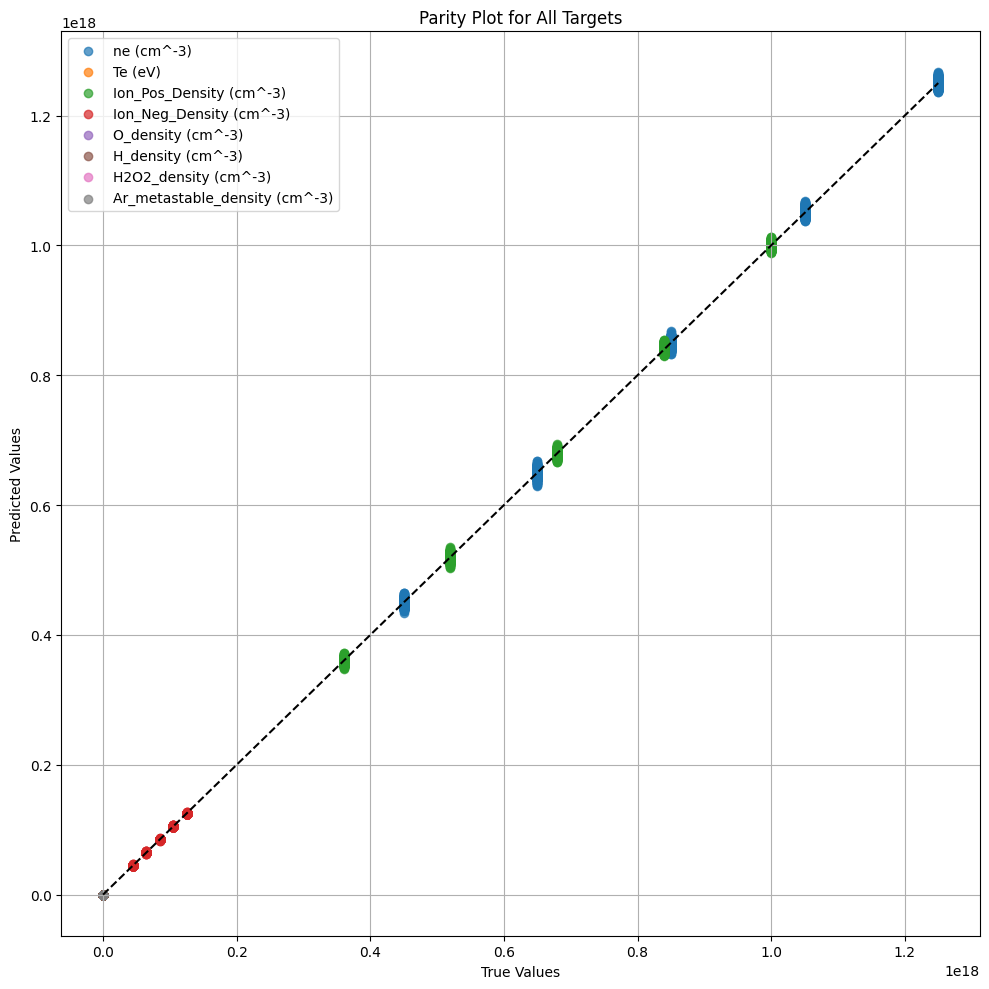

In [ ]:
# پیش‌بینی با مدل آموزش‌دیده و بازگرداندن به مقیاس اصلی
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test)

plt.figure(figsize=(10, 10))
for i in range(len(y_features)):
    plt.scatter(y_test_original[:, i], y_pred[:, i], label=y_features[i], alpha=0.7)

max_val = np.max(y_test_original)
min_val = np.min(y_test_original)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Parity Plot for All Targets")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import make_pipeline

# مدل ساده با همان pipeline
linear_model = make_pipeline(preprocessor, MultiOutputRegressor(LinearRegression()))

linear_model.fit(X_train, y_train)
y_pred_linear = y_scaler.inverse_transform(linear_model.predict(X_test))

print("\n🔍 مقایسه Linear vs MLP")
for i, target in enumerate(y_features):
    r2_mlp = r2_score(y_test_original[:, i], y_pred[:, i])
    r2_lin = r2_score(y_test_original[:, i], y_pred_linear[:, i])
    print(f"{target}: R² MLP = {r2_mlp:.4f} | R² Linear = {r2_lin:.4f}")



🔍 مقایسه Linear vs MLP
ne (cm^-3): R² MLP = 0.9995 | R² Linear = 1.0000
Te (eV): R² MLP = 0.9995 | R² Linear = 1.0000
Ion_Pos_Density (cm^-3): R² MLP = 0.9995 | R² Linear = 1.0000
Ion_Neg_Density (cm^-3): R² MLP = 0.9995 | R² Linear = 1.0000
O_density (cm^-3): R² MLP = 0.9994 | R² Linear = 0.9360
H_density (cm^-3): R² MLP = 0.9994 | R² Linear = 0.9456
H2O2_density (cm^-3): R² MLP = 0.9993 | R² Linear = 0.9151
Ar_metastable_density (cm^-3): R² MLP = 0.9994 | R² Linear = 0.9546


In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import os

# استخراج بخش‌های لازم از pipeline
regressor = model.named_steps['regressor']
preprocessor = model.named_steps['preprocessor']

# دریافت نام ویژگی‌های پردازش‌شده (بعد از OneHot و StandardScaler)
preprocessed_features = preprocessor.get_feature_names_out()

# تبدیل X برای استفاده در PDP
X_transformed = preprocessor.transform(X_train)

# ایجاد پوشه برای ذخیره نمودارها
os.makedirs("pdp_outputs", exist_ok=True)

# حلقه روی خروجی‌ها
for target_index, target_name in enumerate(y_features):
    print(f"📊 Generating PDP for output: {target_name}")

    # آماده‌سازی نمودار
    fig, ax = plt.subplots(
        nrows=int(np.ceil(len(preprocessed_features)/2)), ncols=2,
        figsize=(16, len(preprocessed_features) * 1.8)
    )
    ax = ax.flatten()

    for i, feature_name in enumerate(preprocessed_features):
        try:
            display = PartialDependenceDisplay.from_estimator(
                regressor.estimators_[target_index],
                X_transformed,
                features=[i],
                feature_names=preprocessed_features,
                ax=ax[i],
                line_kw={"color": "blue"},
            )
            ax[i].set_title(f"{feature_name} → {target_name}")
        except Exception as e:
            ax[i].set_visible(False)
            print(f"⛔ Skipped {feature_name} → {target_name}: {e}")

    plt.tight_layout()
    plt.savefig(f"pdp_outputs/PDP_{target_name.replace(' ', '_')}.png")
    plt.close()

print("✅ همه‌ی نمودارهای حساسیت ذخیره شدند داخل پوشه pdp_outputs/")


📊 Generating PDP for output: ne (cm^-3)
📊 Generating PDP for output: Te (eV)
📊 Generating PDP for output: Ion_Pos_Density (cm^-3)
📊 Generating PDP for output: Ion_Neg_Density (cm^-3)
📊 Generating PDP for output: O_density (cm^-3)
📊 Generating PDP for output: H_density (cm^-3)
📊 Generating PDP for output: H2O2_density (cm^-3)
📊 Generating PDP for output: Ar_metastable_density (cm^-3)
✅ همه‌ی نمودارهای حساسیت ذخیره شدند داخل پوشه pdp_outputs/



📊 Partial Dependence for output: ne (cm^-3)


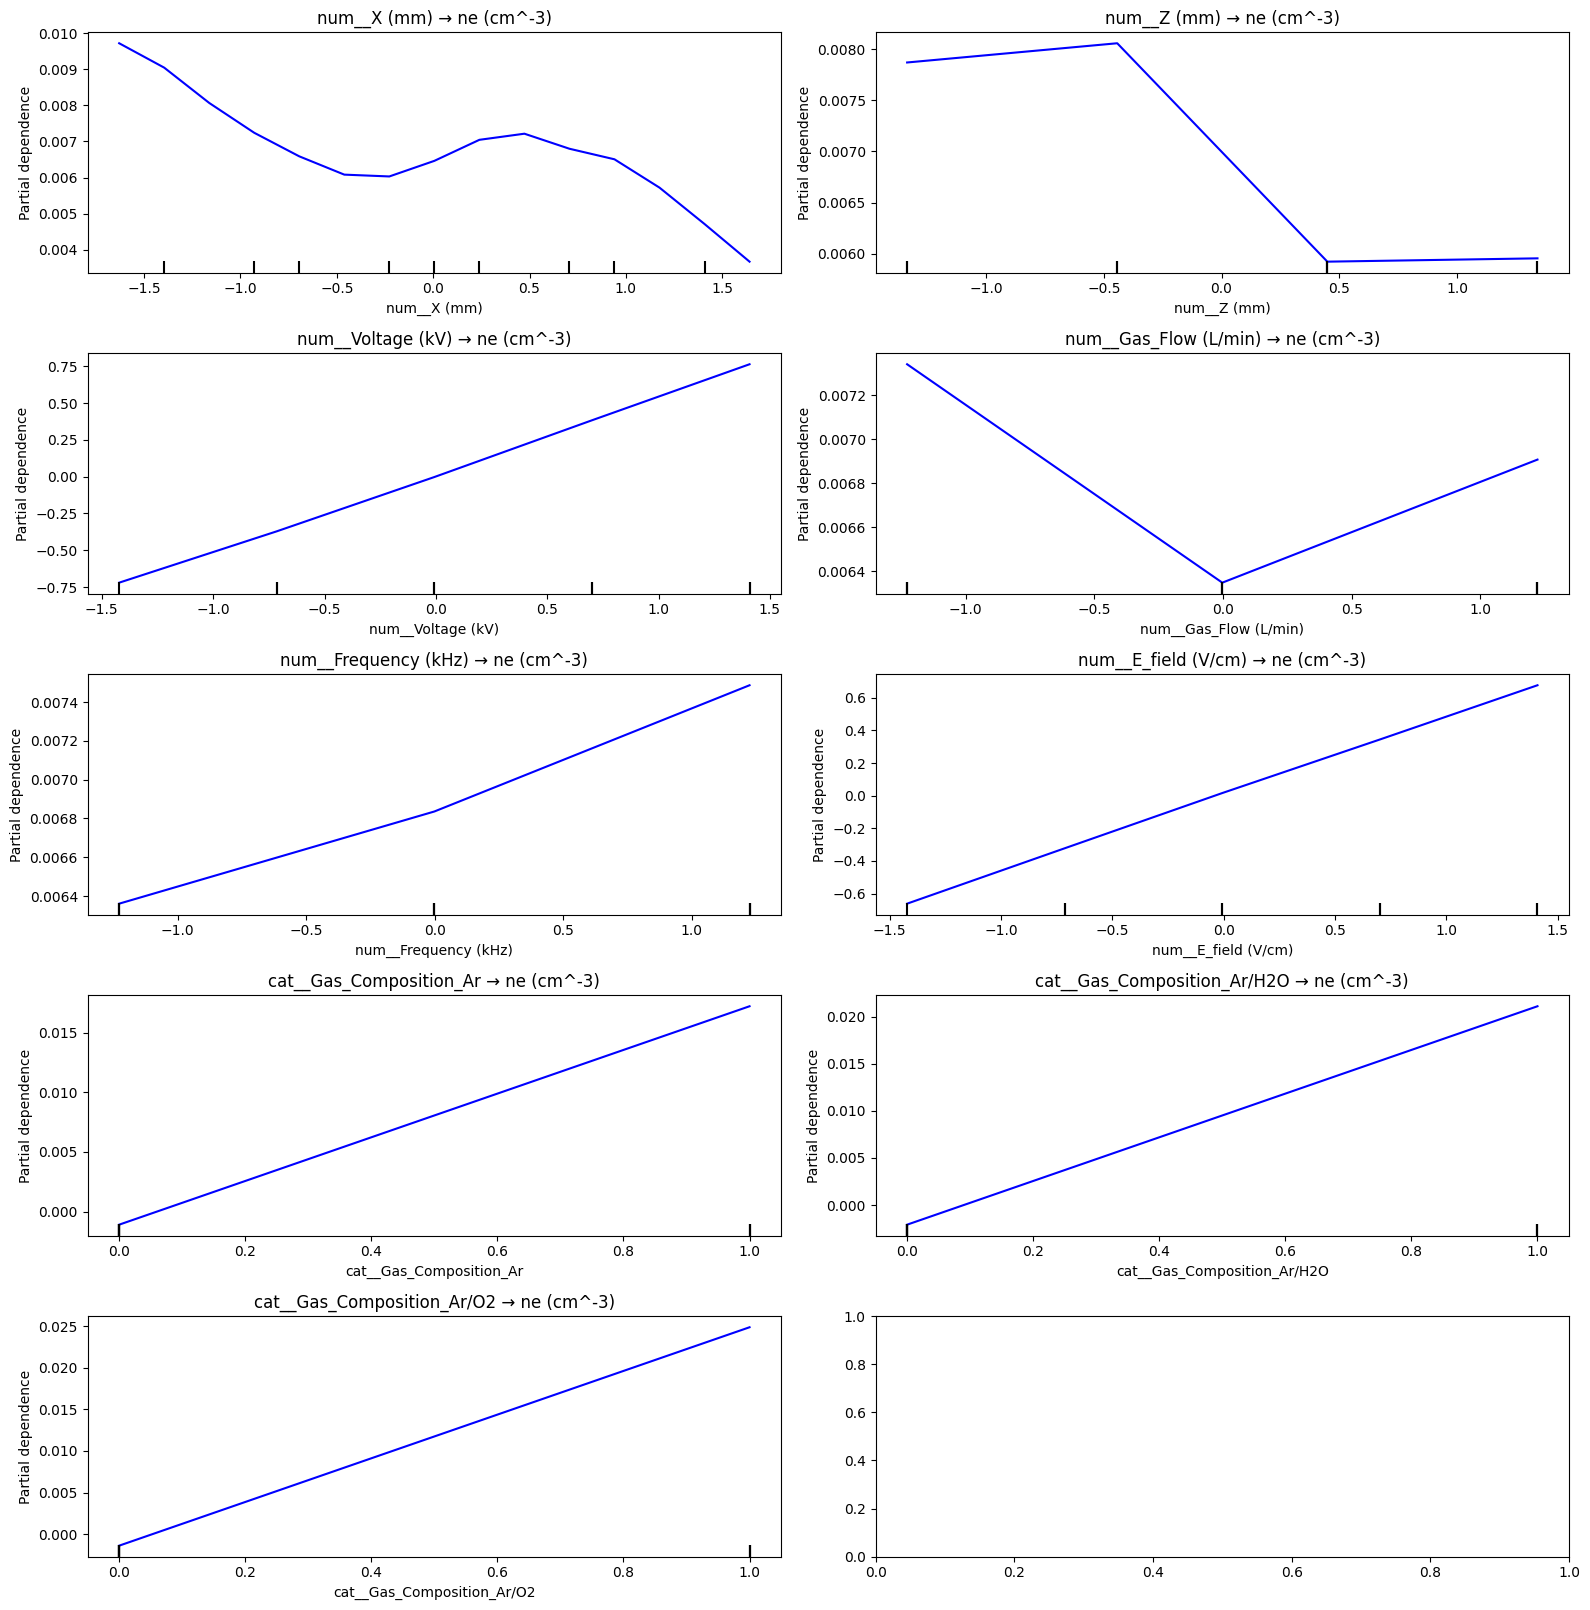


📊 Partial Dependence for output: Te (eV)


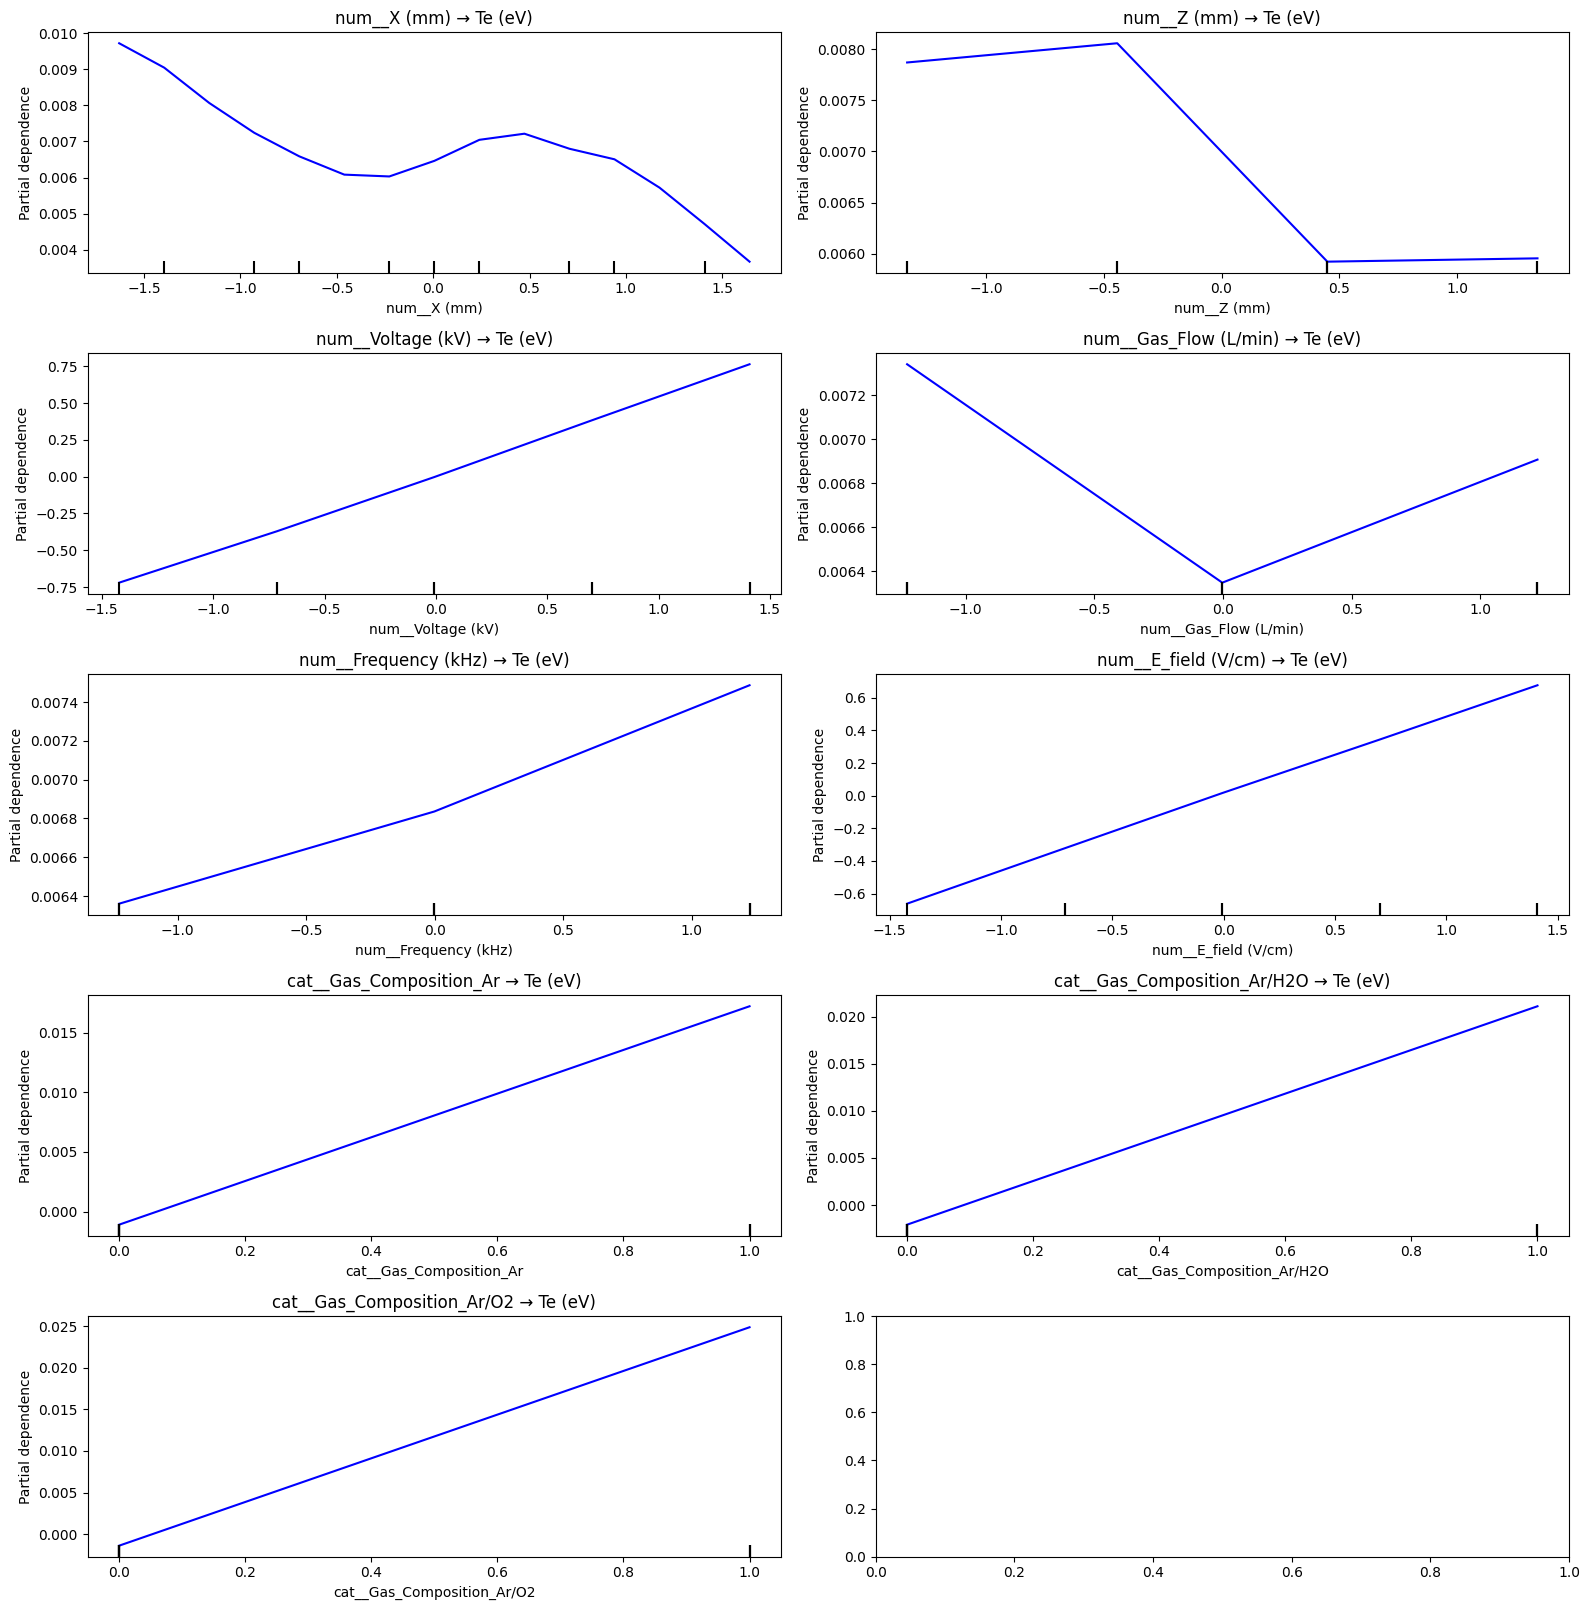


📊 Partial Dependence for output: Ion_Pos_Density (cm^-3)


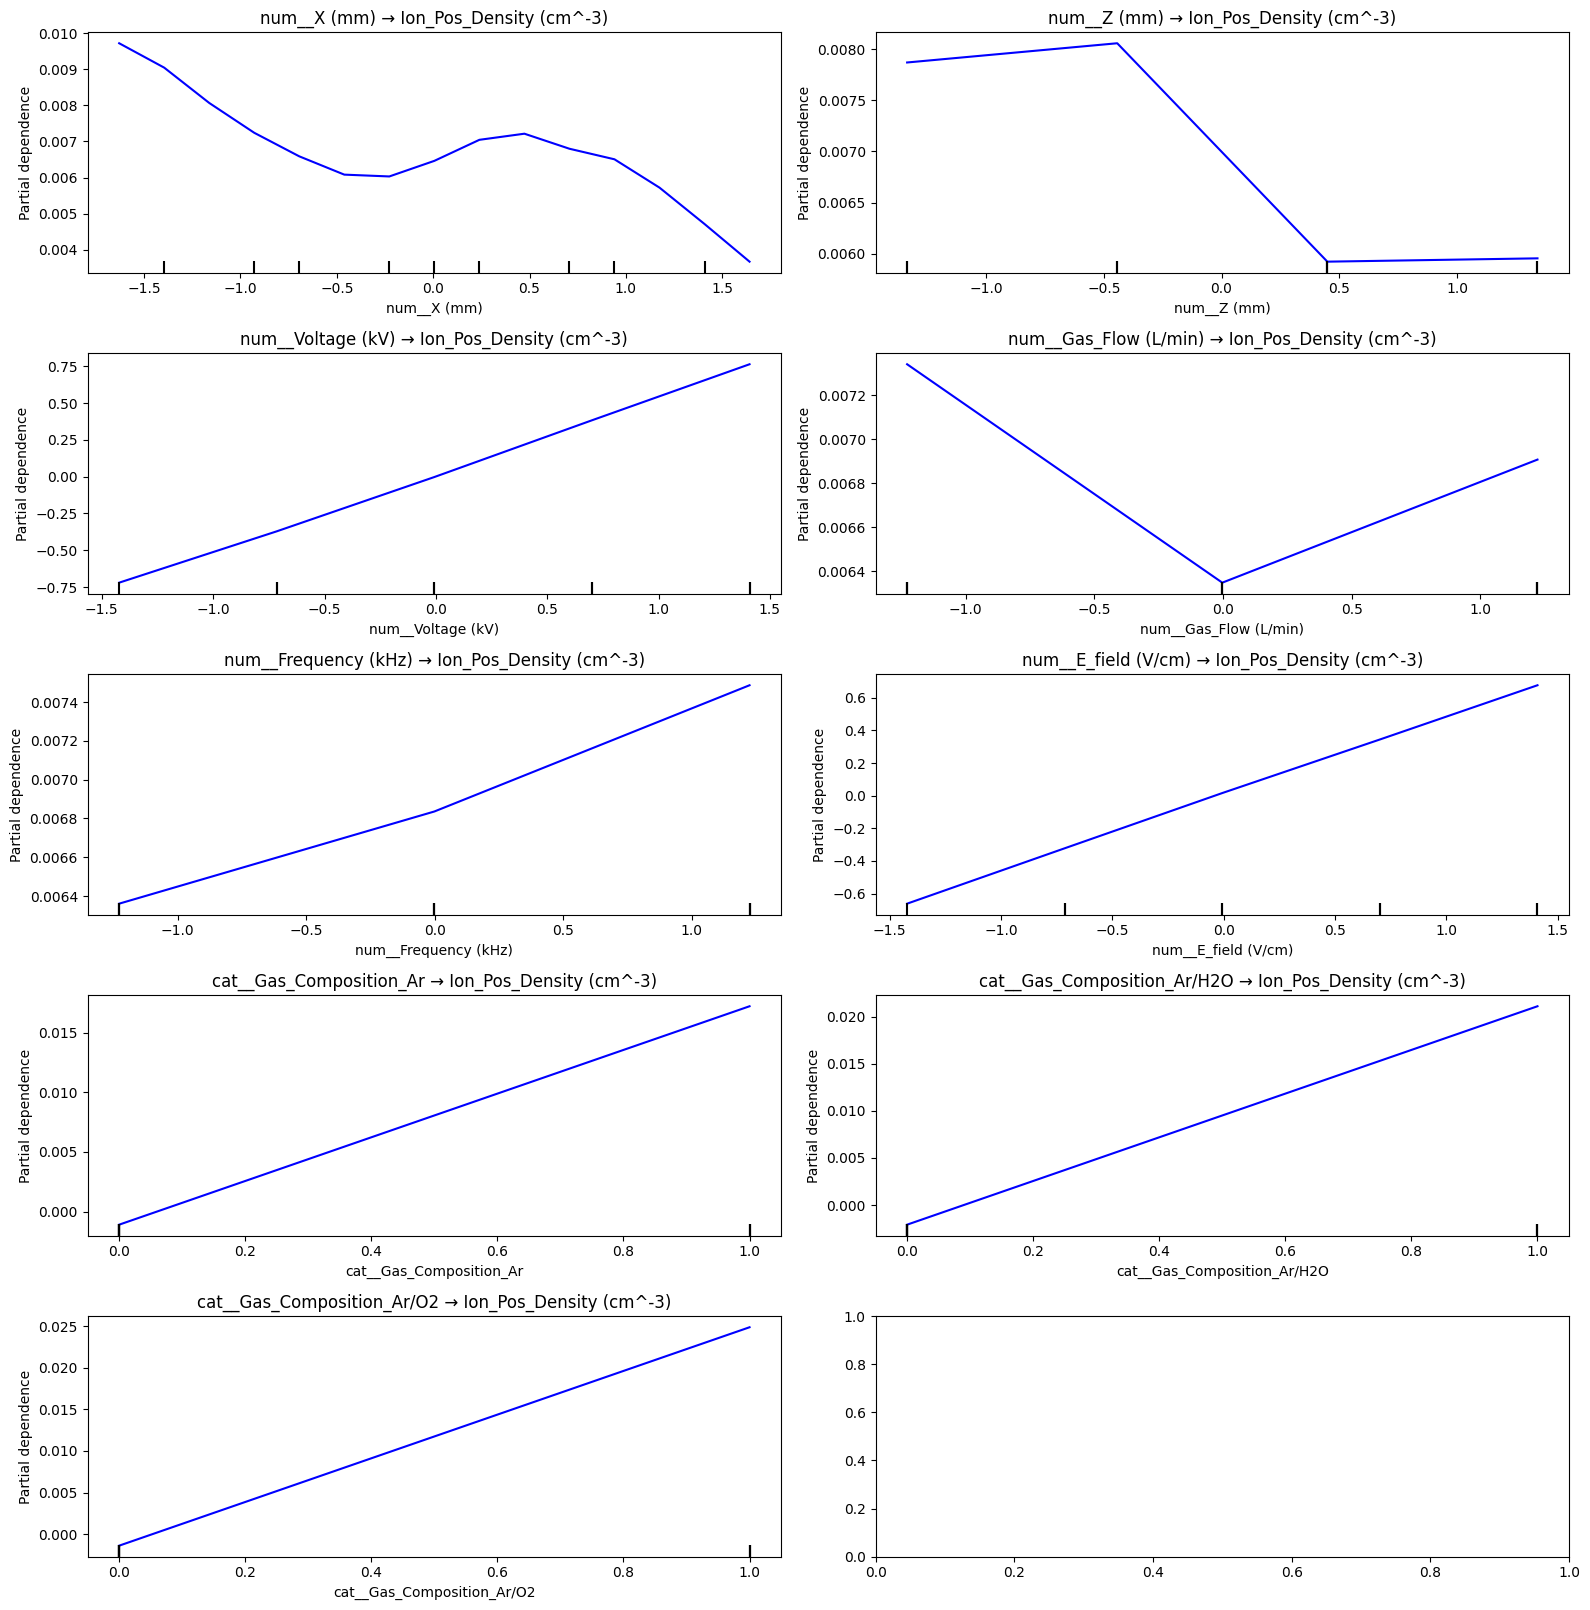


📊 Partial Dependence for output: Ion_Neg_Density (cm^-3)


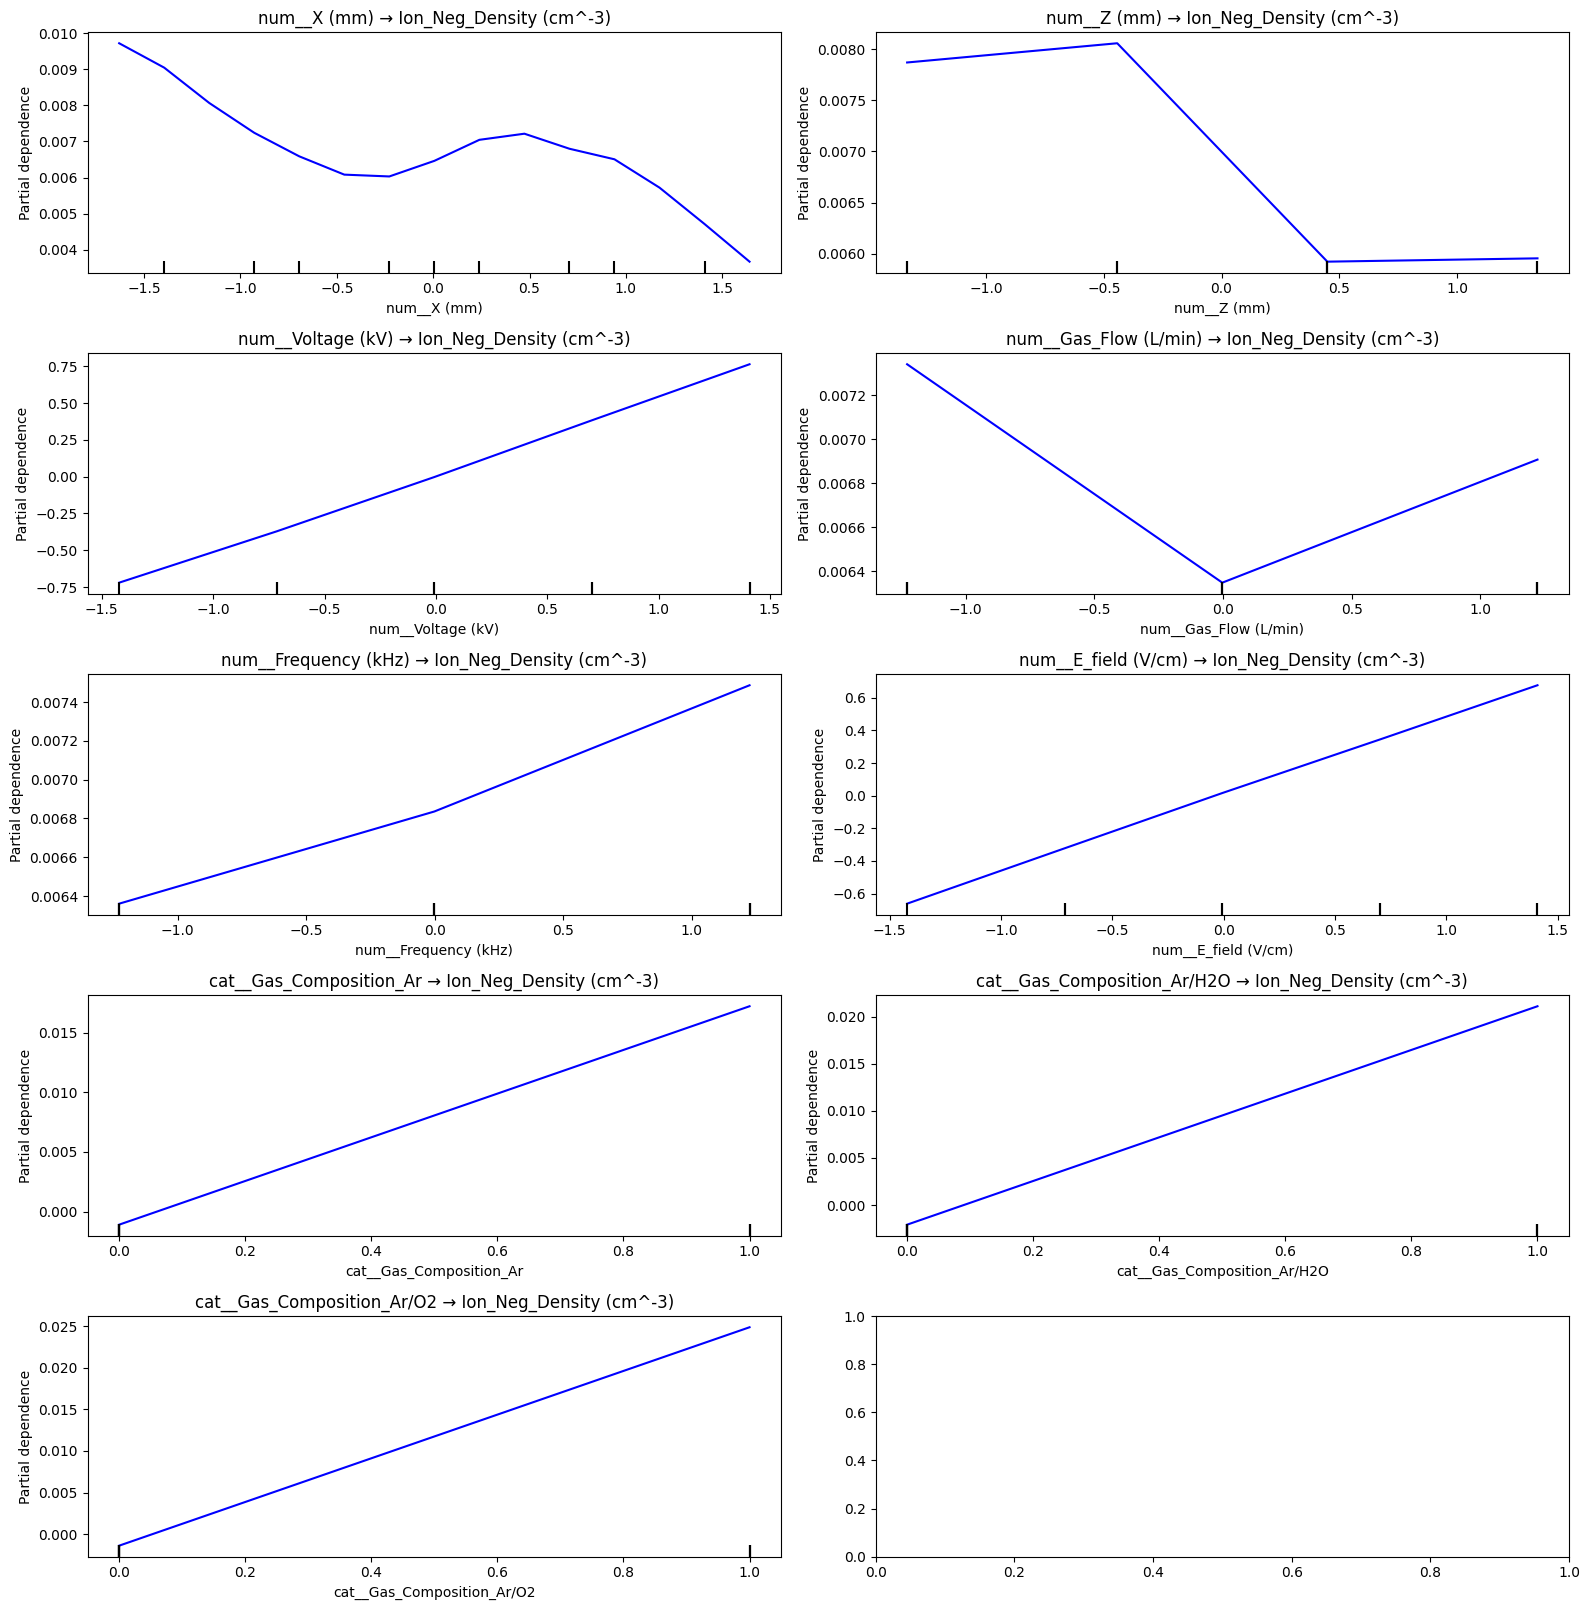


📊 Partial Dependence for output: O_density (cm^-3)


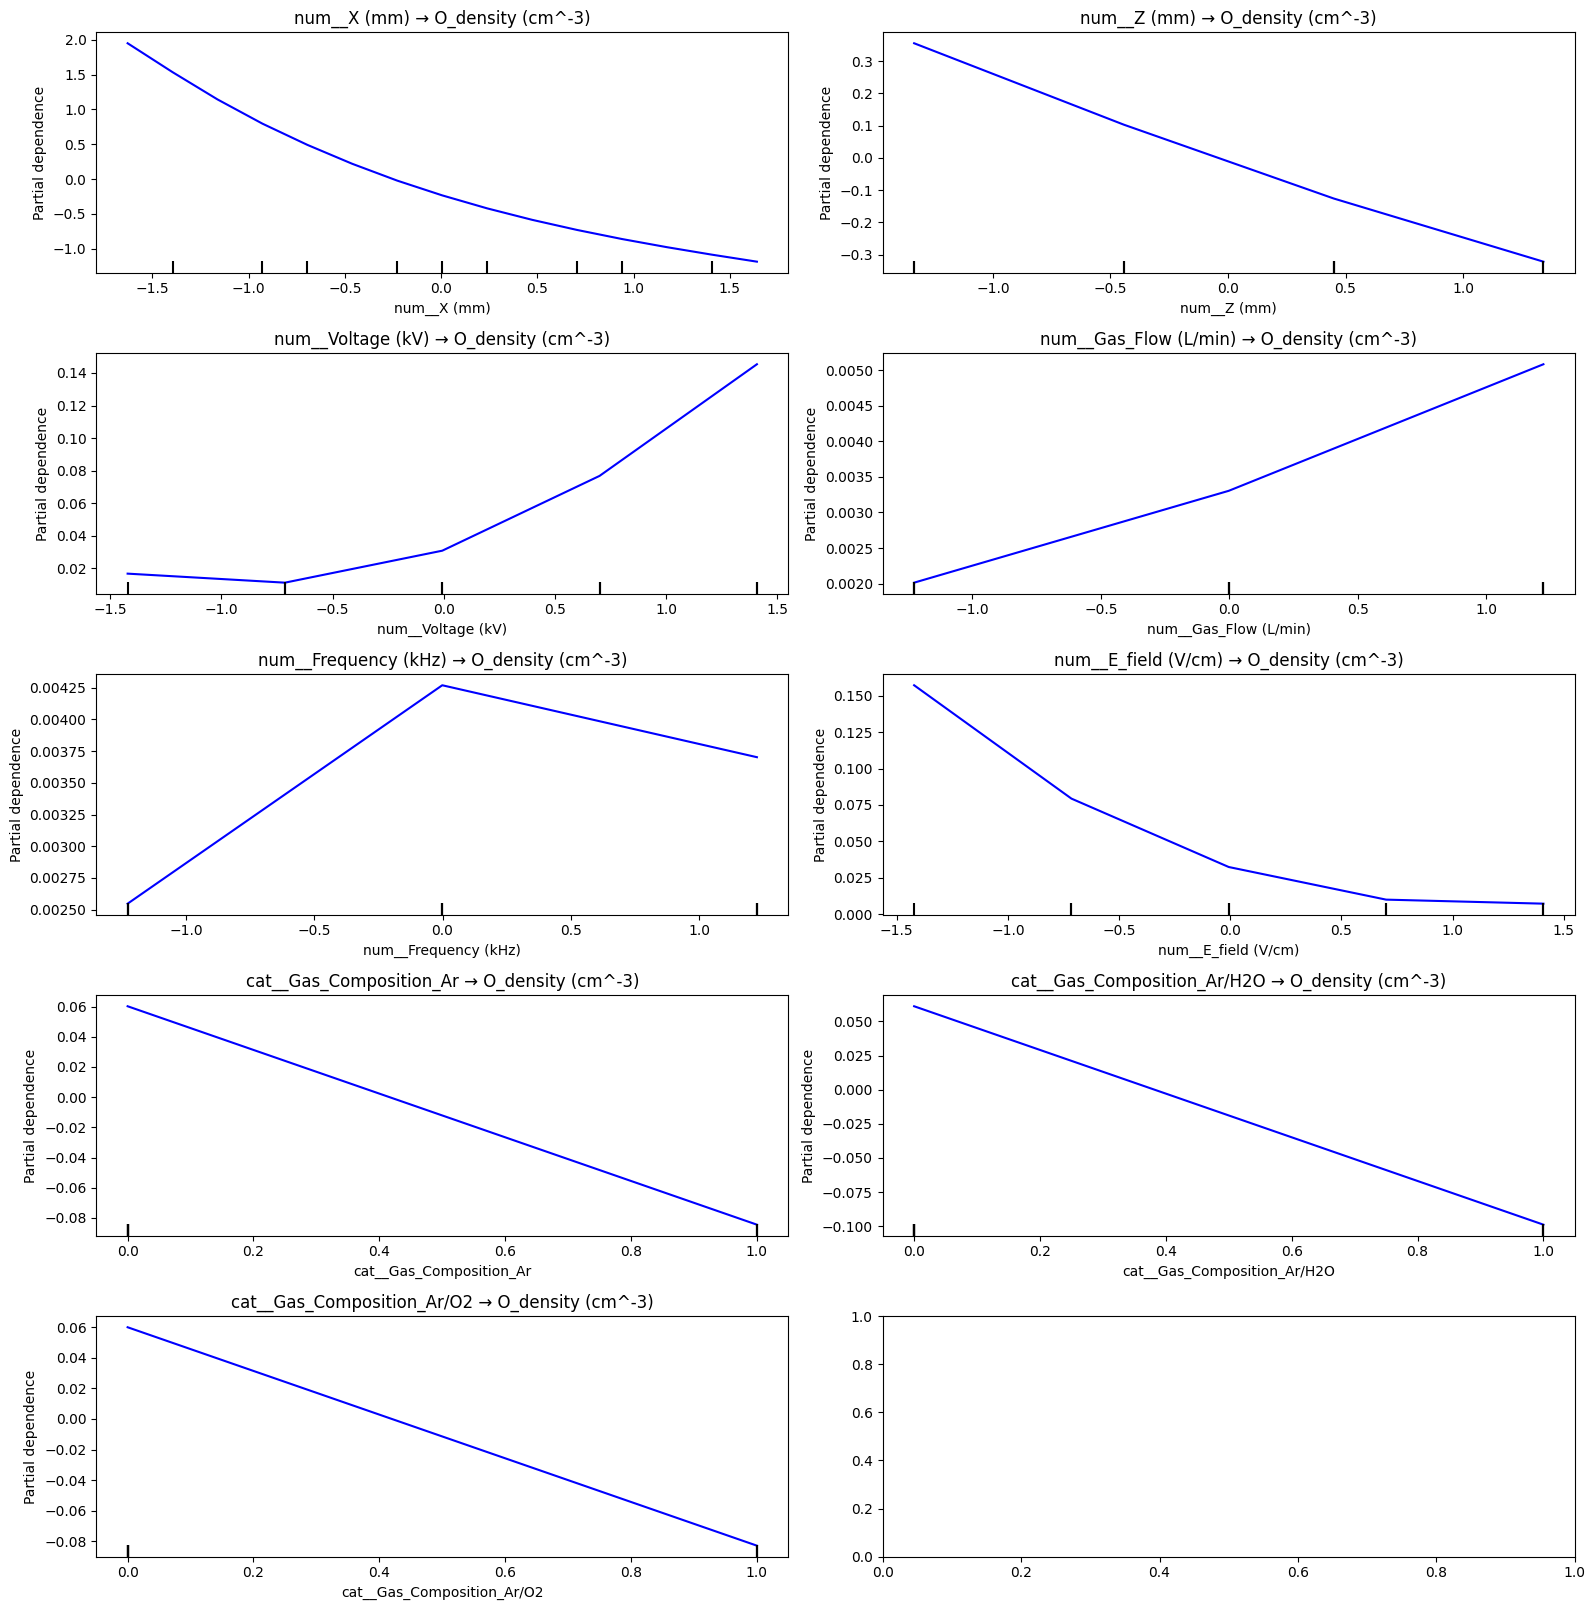


📊 Partial Dependence for output: H_density (cm^-3)


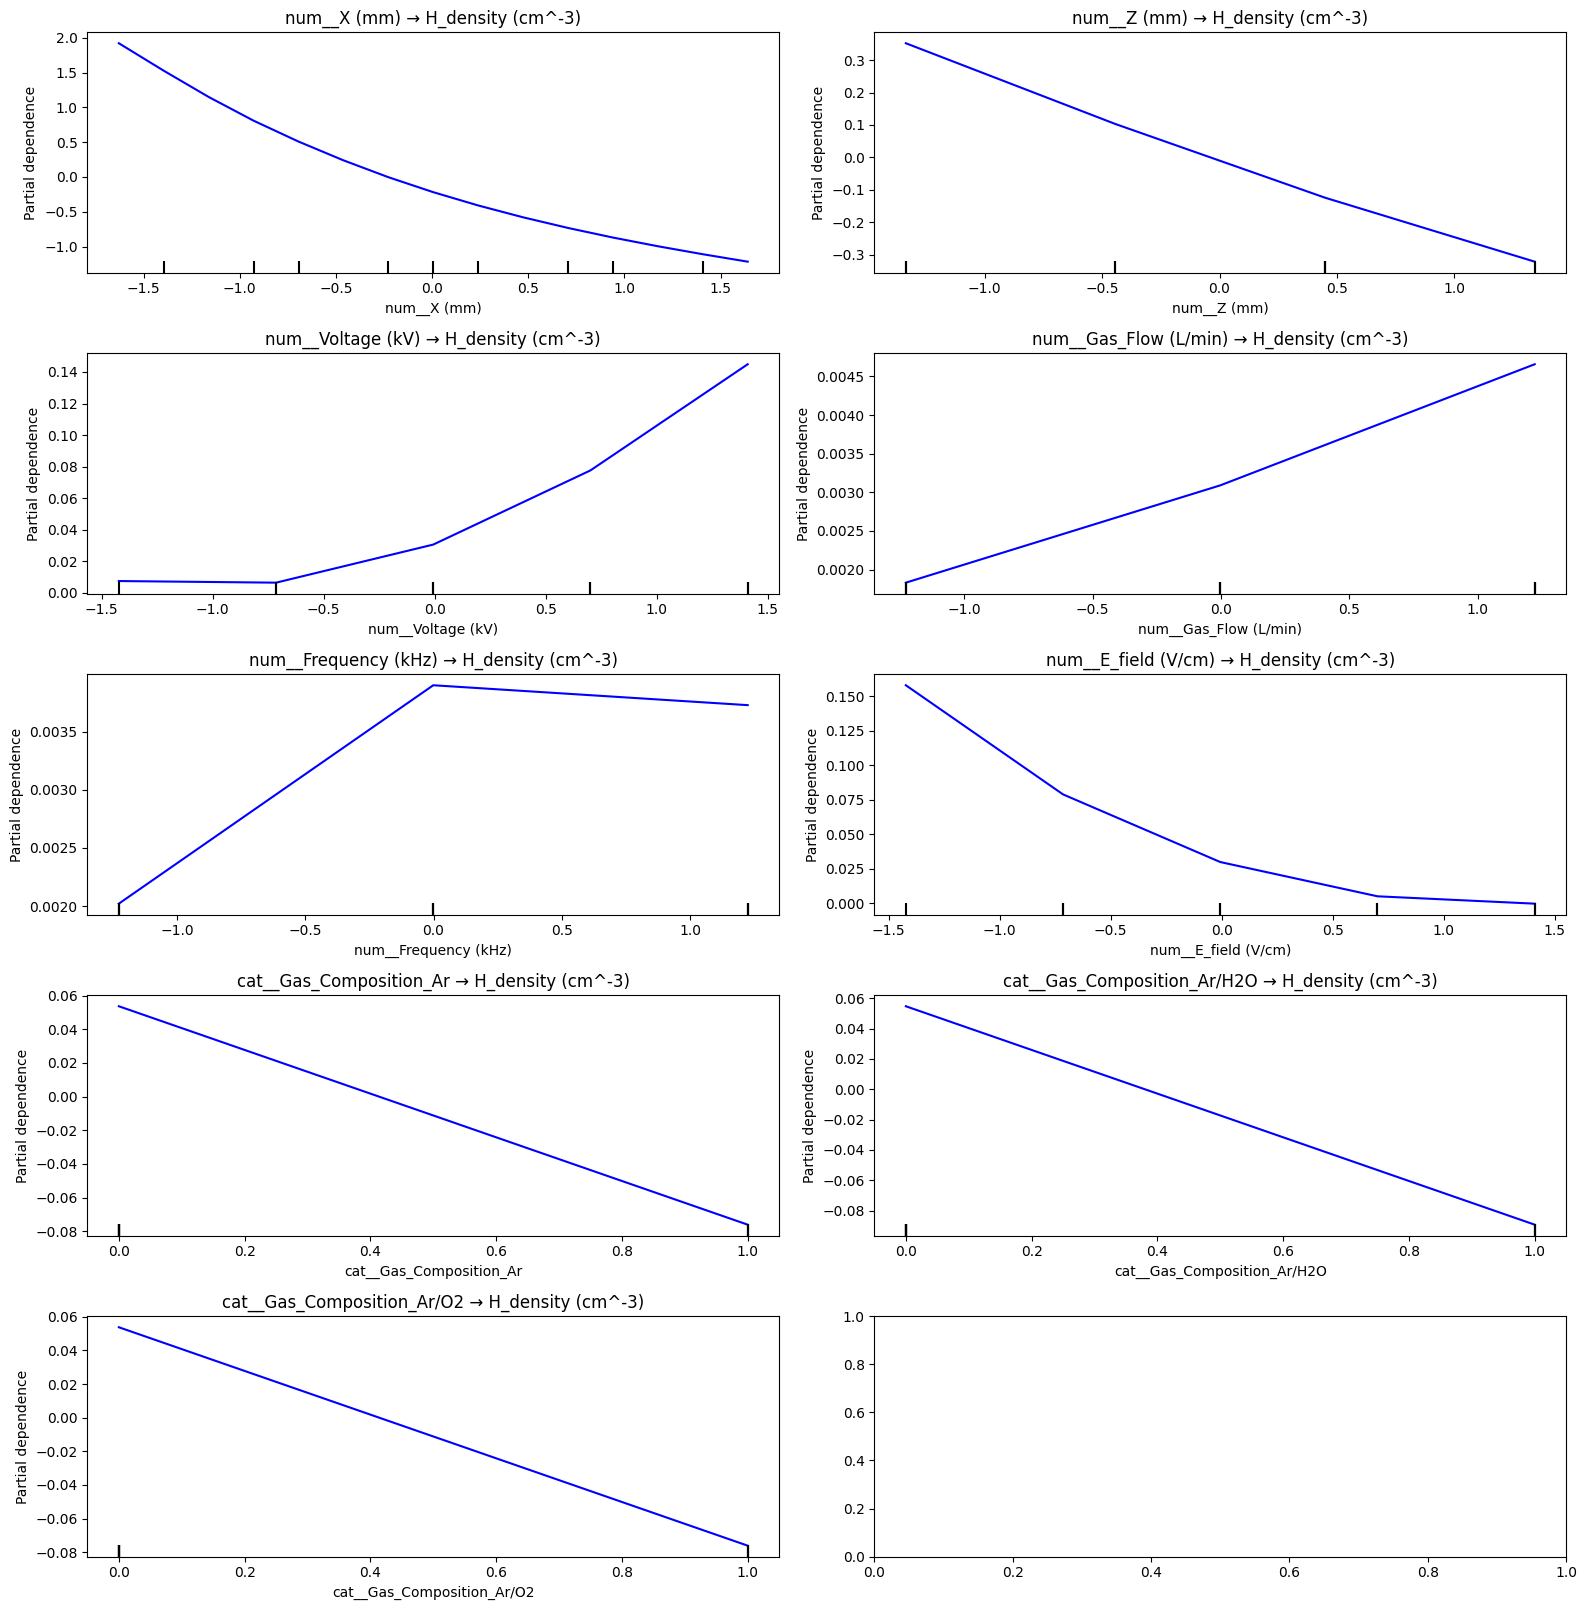


📊 Partial Dependence for output: H2O2_density (cm^-3)


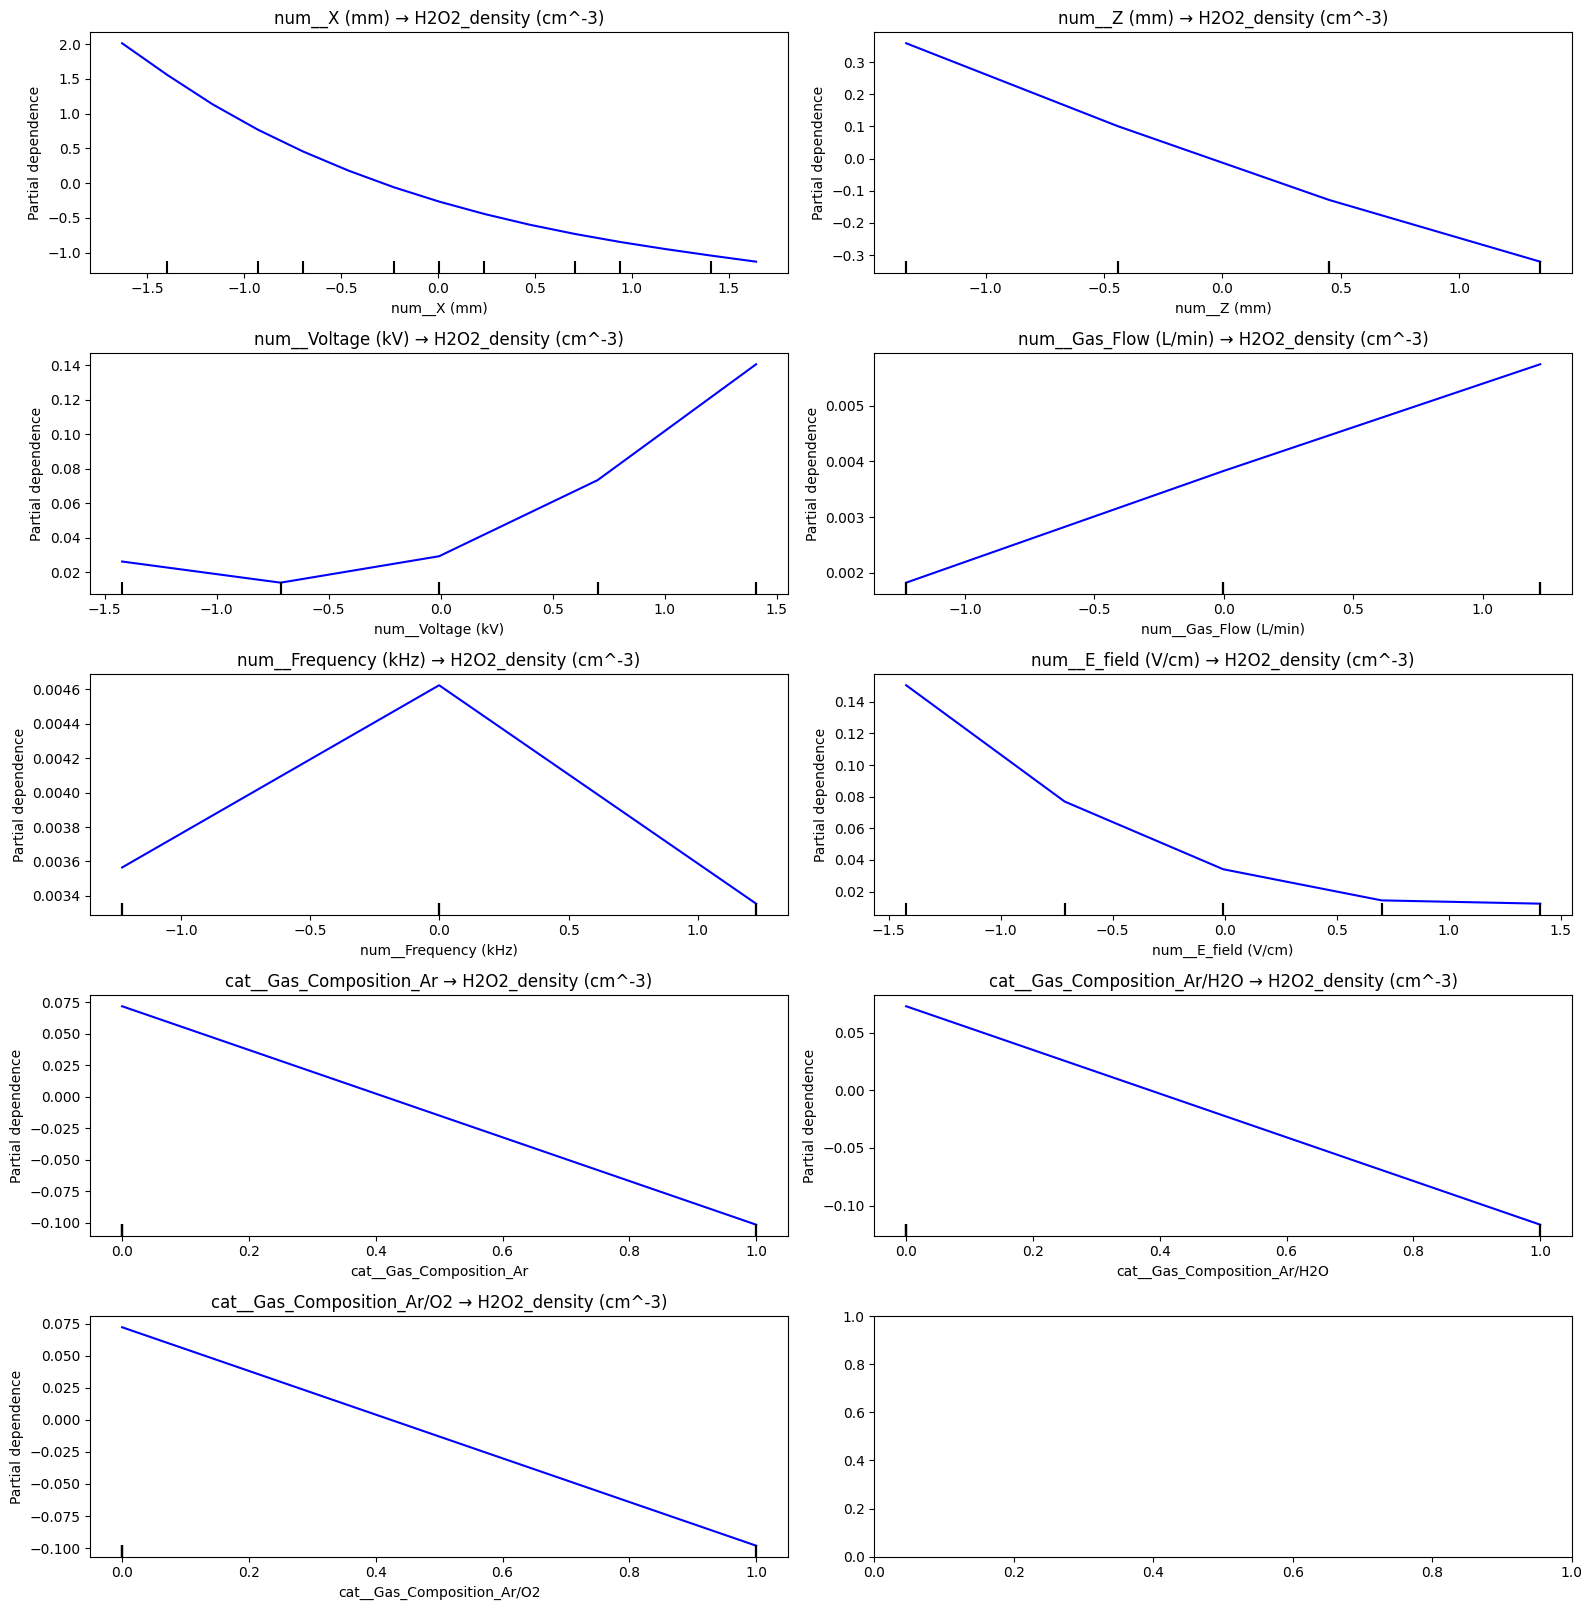


📊 Partial Dependence for output: Ar_metastable_density (cm^-3)


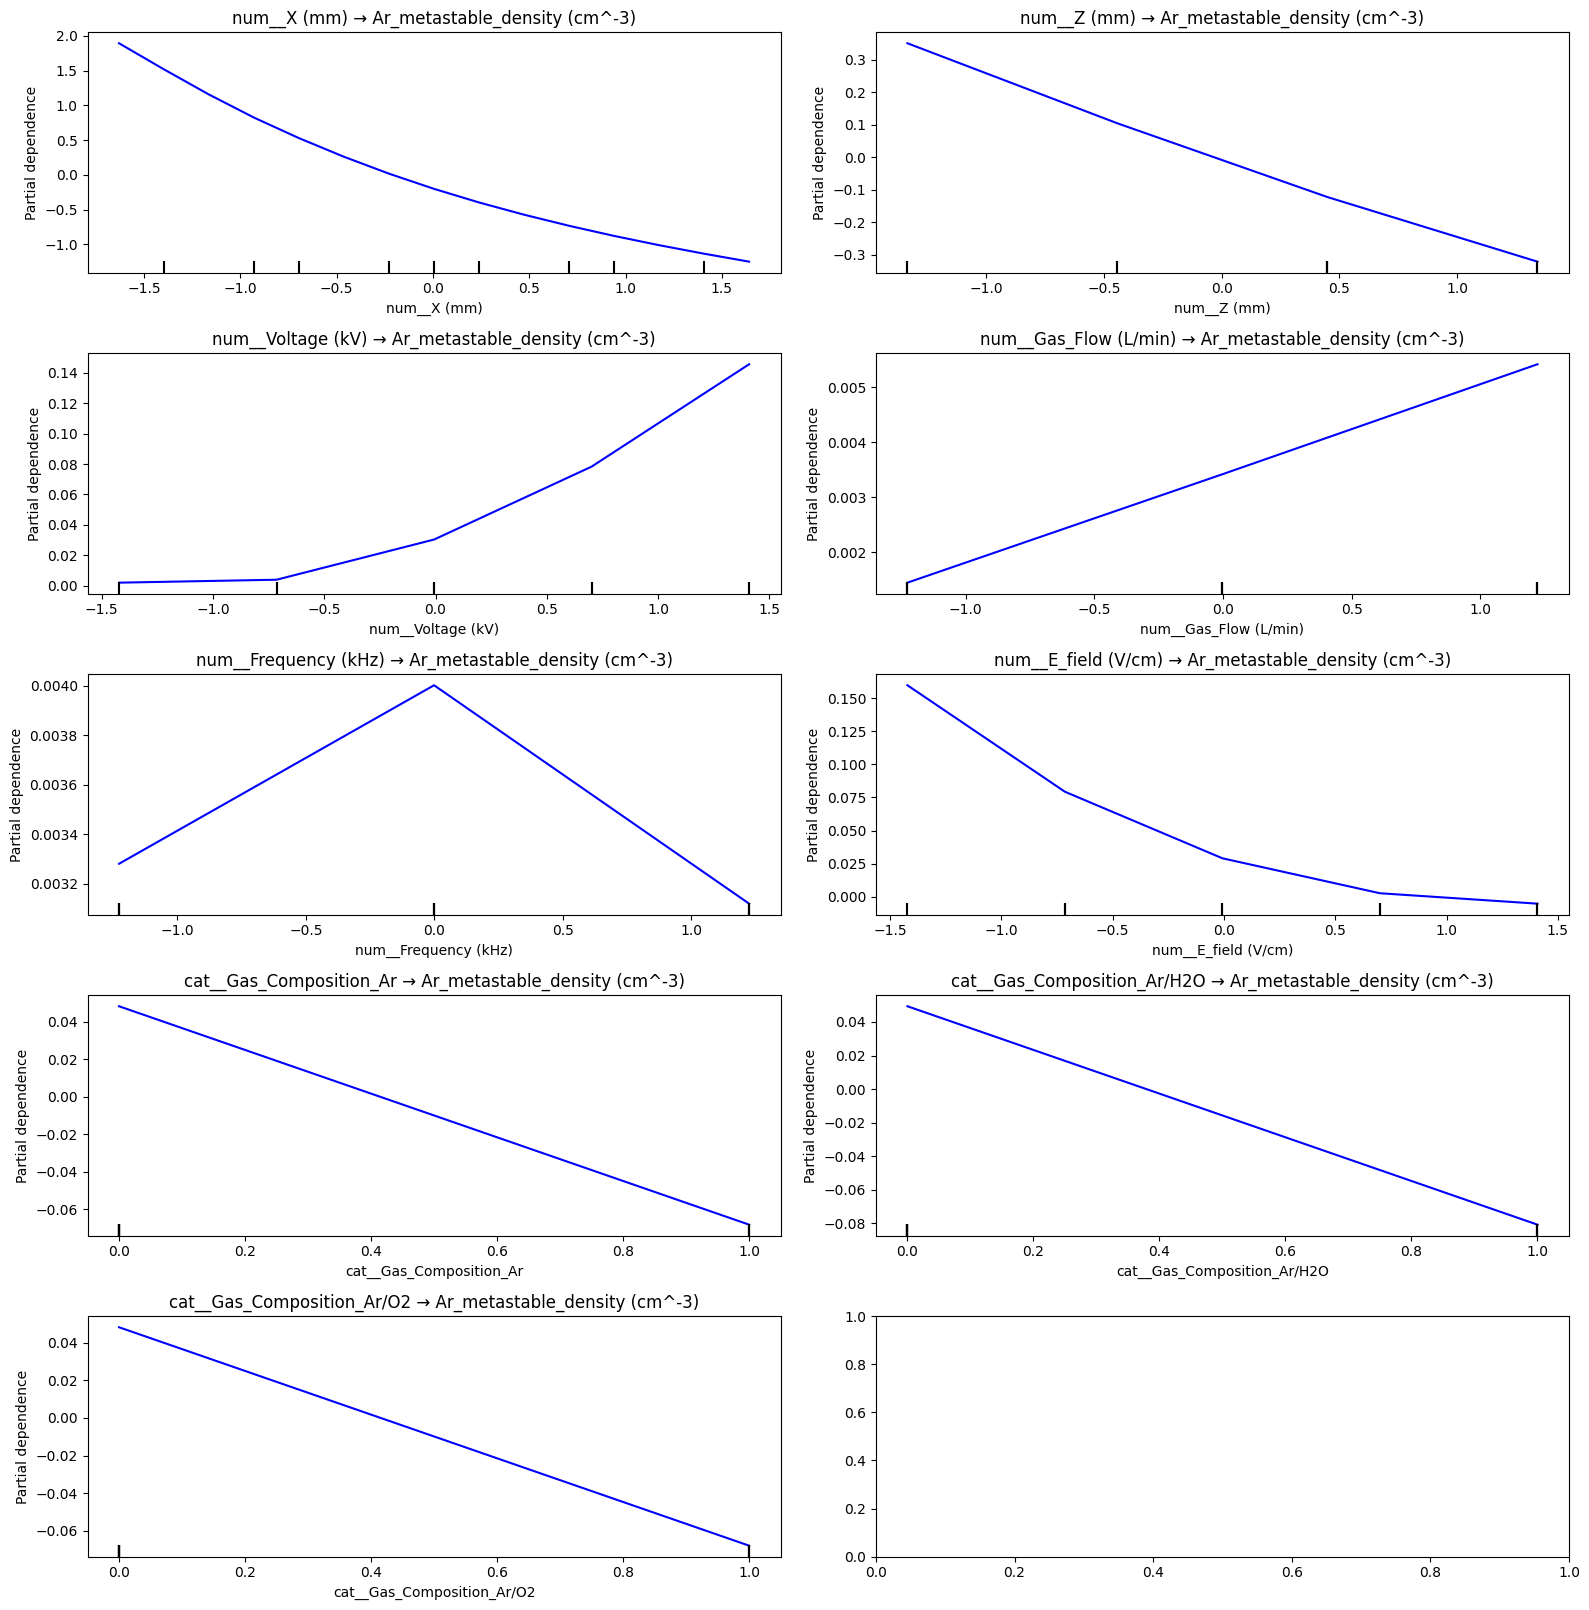

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.pipeline import Pipeline

# استخراج بخش‌های مدل
regressor = model.named_steps['regressor']
preprocessor = model.named_steps['preprocessor']

# تبدیل X به ورودی پیش‌پردازش‌شده
X_transformed = preprocessor.transform(X_train)

# نام ویژگی‌های پیش‌پردازش‌شده
feature_names = preprocessor.get_feature_names_out()

# ✅ حلقه روی همه‌ی خروجی‌ها
for target_index, target_name in enumerate(y_features):
    print(f"\n📊 Partial Dependence for output: {target_name}")

    # تعداد ویژگی‌ها
    num_features = len(feature_names)

    # آماده‌سازی شکل
    fig, ax = plt.subplots(nrows=int(np.ceil(num_features / 2)), ncols=2, figsize=(16, num_features * 1.8))
    ax = ax.flatten()

    for i in range(num_features):
        try:
            PartialDependenceDisplay.from_estimator(
                regressor.estimators_[target_index],
                X_transformed,
                features=[i],
                feature_names=feature_names,
                ax=ax[i],
                line_kw={"color": "blue"},
            )
            ax[i].set_title(f"{feature_names[i]} → {target_name}")
        except Exception as e:
            ax[i].set_visible(False)
            print(f"⛔ Skipped {feature_names[i]}: {e}")

    plt.tight_layout()
    plt.show()


In [ ]:
import graphviz

dot = graphviz.Digraph(format='png')
dot.attr(rankdir='LR')

dot.node('A', 'Data Acquisition')
dot.node('B', 'Preprocessing\n(Normalization, Encoding)')
dot.node('C', 'Train/Test Split\n& Cross-Validation')
dot.node('D', 'MLP Model\nTraining')
dot.node('E', 'Prediction\n& Inverse Scaling')
dot.node('F', 'Evaluation\n(R², RMSE)')
dot.node('G', 'Feature Importance\n& Sensitivity')
dot.node('H', 'Result Interpretation\n& Visualization')

dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH'])

dot.render('mlp_model_workflow', view=True)


'mlp_model_workflow.png'

In [ ]:
!pip install catboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
              'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']
y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)',
              'Ion_Neg_Density (cm^-3)', 'O_density (cm^-3)', 'H_density (cm^-3)',
              'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

X = df[X_features]
y = df[y_features]

# Scaling outputs
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

# Preprocessing
numeric_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'E_field (V/cm)']
categorical_features = ['Gas_Composition']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(CatBoostRegressor(verbose=0)))
])
model.fit(X_train, y_train)

# Inverse and evaluation
y_pred = model.predict(X_test)
y_pred_inv = y_scaler.inverse_transform(y_pred)
y_test_inv = y_scaler.inverse_transform(y_test)

from sklearn.metrics import r2_score, mean_squared_error

# فرض: y_test_inv و y_pred_inv و y.columns از قبل تعریف شده‌اند

for i, col in enumerate(y.columns):
    r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])
    rmse = mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i]) ** 0.5  # دستی چون squared پشتیبانی نمی‌شه
    print(f"{col}: R² = {r2:.4f} | RMSE = {rmse:.4e}")


ne (cm^-3): R² = 1.0000 | RMSE = 4.8416e+12
Te (eV): R² = 1.0000 | RMSE = 1.2104e-06
Ion_Pos_Density (cm^-3): R² = 1.0000 | RMSE = 3.8733e+12
Ion_Neg_Density (cm^-3): R² = 1.0000 | RMSE = 4.8416e+11
O_density (cm^-3): R² = 1.0000 | RMSE = 5.2398e+09
H_density (cm^-3): R² = 1.0000 | RMSE = 3.9577e+09
H2O2_density (cm^-3): R² = 1.0000 | RMSE = 1.1611e+09
Ar_metastable_density (cm^-3): R² = 1.0000 | RMSE = 6.7518e+08


📊 CatBoost Performance on Test Set:
ne (cm^-3): R² = 1.0000 | RMSE = 4.8416e+12
Te (eV): R² = 1.0000 | RMSE = 1.2104e-06
Ion_Pos_Density (cm^-3): R² = 1.0000 | RMSE = 3.8733e+12
Ion_Neg_Density (cm^-3): R² = 1.0000 | RMSE = 4.8416e+11
O_density (cm^-3): R² = 1.0000 | RMSE = 5.2398e+09
H_density (cm^-3): R² = 1.0000 | RMSE = 3.9577e+09
H2O2_density (cm^-3): R² = 1.0000 | RMSE = 1.1611e+09
Ar_metastable_density (cm^-3): R² = 1.0000 | RMSE = 6.7518e+08


/tmp/ipython-input-11-3333820094.py:92: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


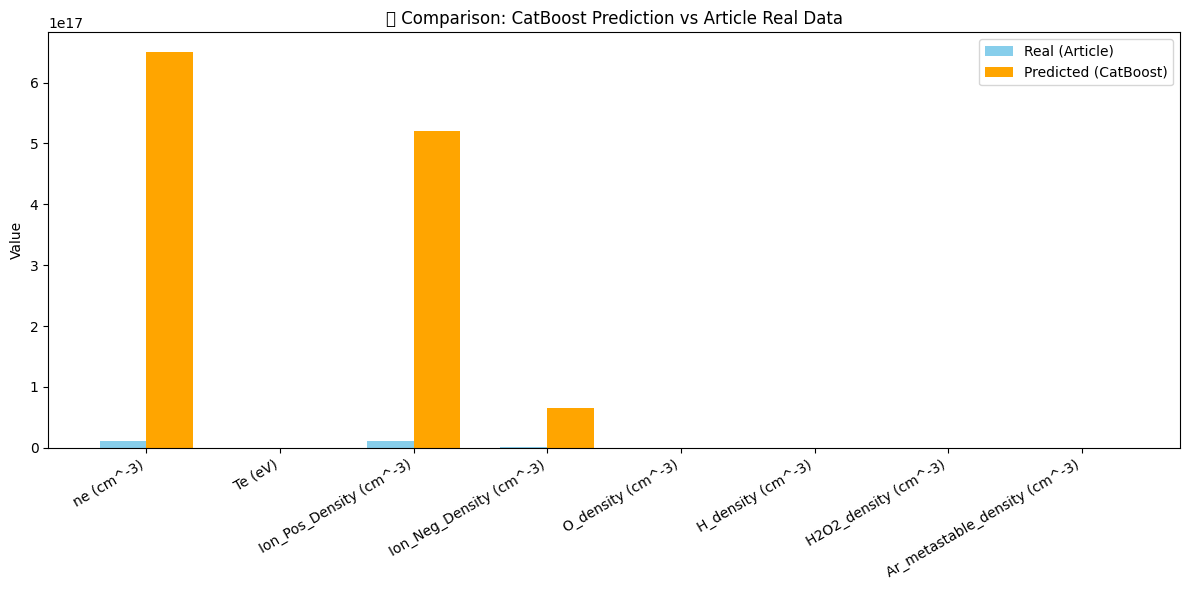


📉 Relative Errors (%):
ne (cm^-3): 5316.69%
Te (eV): 93.33%
Ion_Pos_Density (cm^-3): 4627.29%
Ion_Neg_Density (cm^-3): 6400.03%
O_density (cm^-3): 181.96%
H_density (cm^-3): 262.23%
H2O2_density (cm^-3): 2117.88%
Ar_metastable_density (cm^-3): 2928.54%


In [ ]:

# 📦 کتابخانه‌ها
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
from catboost import CatBoostRegressor

# 🧪 بارگذاری داده
df = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# 🎯 ویژگی‌ها
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
              'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']
y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
              'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

X = df[X_features]
y = df[y_features]

# ⚙️ نرمال‌سازی خروجی‌ها
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

# ⚙️ پردازش ورودی‌ها
numeric_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
                    'Frequency (kHz)', 'E_field (V/cm)']
categorical_features = ['Gas_Composition']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 🚂 تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# 🧠 ساخت مدل
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(CatBoostRegressor(verbose=0)))
])
model.fit(X_train, y_train)

# 🔍 پیش‌بینی و بازگشت به مقیاس اصلی
y_pred = model.predict(X_test)
y_pred_inv = y_scaler.inverse_transform(y_pred)
y_test_inv = y_scaler.inverse_transform(y_test)

# 🎯 ارزیابی مدل
print("📊 CatBoost Performance on Test Set:")
for i, col in enumerate(y.columns):
    r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])
    rmse = mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i]) ** 0.5
    print(f"{col}: R² = {r2:.4f} | RMSE = {rmse:.4e}")

# 📘 داده واقعی مقاله برای مقایسه
true_values = {
    'ne (cm^-3)': 1.2e16,
    'Te (eV)': 2.7,
    'Ion_Pos_Density (cm^-3)': 1.1e16,
    'Ion_Neg_Density (cm^-3)': 1.0e15,
    'O_density (cm^-3)': 5.2e12,
    'H_density (cm^-3)': 3.8e12,
    'H2O2_density (cm^-3)': 1.2e11,
    'Ar_metastable_density (cm^-3)': 1.0e11
}

# 🔬 مقایسه با پیش‌بینی
sample = X_test.iloc[[0]]
pred = model.predict(sample)
pred_inv = y_scaler.inverse_transform(pred)[0]

labels = list(true_values.keys())
true_vals = [true_values[k] for k in labels]
pred_vals = pred_inv.tolist()
rel_errors = [abs(p - t) / t * 100 for p, t in zip(pred_vals, true_vals)]

# 📈 نمودار مقایسه‌ای
x = np.arange(len(labels))
bar_width = 0.35
plt.figure(figsize=(12, 6))
plt.bar(x, true_vals, bar_width, label='Real (Article)', color='skyblue')
plt.bar(x + bar_width, pred_vals, bar_width, label='Predicted (CatBoost)', color='orange')
plt.xticks(x + bar_width / 2, labels, rotation=30, ha='right')
plt.ylabel("Value")
plt.title("🧪 Comparison: CatBoost Prediction vs Article Real Data")
plt.legend()
plt.tight_layout()
plt.show()

# 📊 خطای نسبی
print("\n📉 Relative Errors (%):")
for i, key in enumerate(labels):
    print(f"{key}: {rel_errors[i]:.2f}%")


/tmp/ipython-input-13-3685628549.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-13-3685628549.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


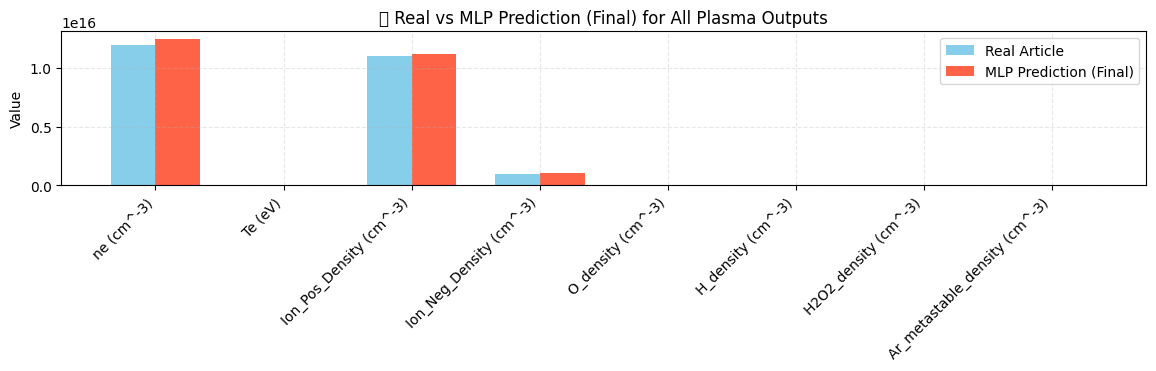

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# پارامترها
params = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
          'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

# مقدار واقعی مقاله
true_values = np.array([
    1.2e16, 2.7, 1.1e16, 1.0e15,
    5.2e12, 3.8e12, 1.2e11, 1.0e11
])

# مقدار پیش‌بینی‌شده توسط MLP (آخرین دو مقدار از fine-tuned)
mlp_predictions = np.array([
    1.25e16, 2.46, 1.12e16, 1.09e15,
    5.28e12, 3.83e12, 1.34e11, 1.08e11
])

# رسم نمودار
x = np.arange(len(params))
width = 0.35

plt.figure(figsize=(14,2))
plt.bar(x - width/2, true_values, width, label='Real Article', color='skyblue')
plt.bar(x + width/2, mlp_predictions, width, label='MLP Prediction (Final)', color='tomato')
plt.xticks(x, params, rotation=45, ha='right')
plt.ylabel('Value')
plt.title('📊 Real vs MLP Prediction (Final) for All Plasma Outputs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipython-input-24-1095537955.py:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


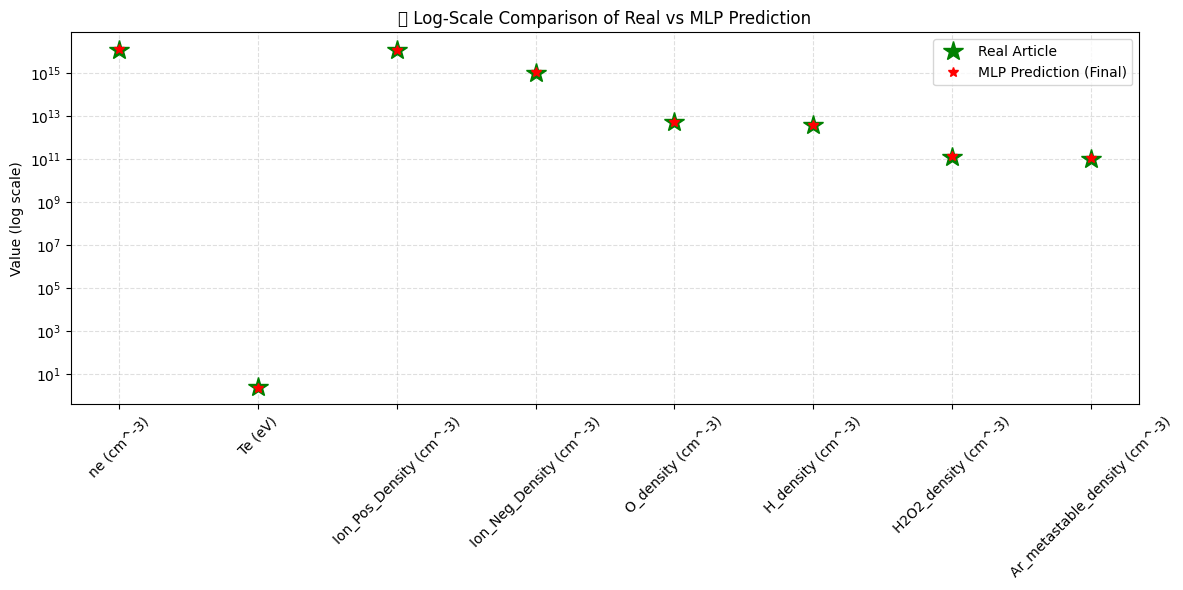

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# نام خروجی‌ها
outputs = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
           'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

# مقدار واقعی مقاله
real_values = np.array([
    1.2e16, 2.7, 1.1e16, 1.0e15,
    5.2e12, 3.8e12, 1.2e11, 1.0e11
])

# مقدار نهایی پیش‌بینی‌شده توسط MLP
predicted_values = np.array([
    1.25e16, 2.46, 1.12e16, 1.09e15,
    5.28e12, 3.83e12, 1.34e11, 1.08e11
])

# رسم با log scale
plt.figure(figsize=(12, 6))
plt.plot(outputs, real_values, 'g*', label='Real Article', linewidth=2, markersize=15)
plt.plot(outputs, predicted_values, 'r*', label='MLP Prediction (Final)', linewidth=2, markersize=7)
plt.yscale('log')
plt.ylabel("Value (log scale)")
plt.xticks(rotation=45)
plt.title("📈 Log-Scale Comparison of Real vs MLP Prediction")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
# ✅ نصب کتابخانه مورد نیاز
!pip install tensorflow

# ✅ 1. کتابخانه‌ها
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ✅ 2. بارگذاری داده
df = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
              'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']
y_features = ['ne (cm^-3)', 'Te (eV)']

X = df[X_features]
y = df[y_features]

# ✅ 3. پیش‌پردازش X
numeric_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)', 'Frequency (kHz)', 'E_field (V/cm)']
categorical_features = ['Gas_Composition']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])

X_processed = preprocessor.fit_transform(X)

# ✅ 4. نرمال‌سازی y_ne با MinMax
ne_scaler = MinMaxScaler()
y_ne_scaled = ne_scaler.fit_transform(y[['ne (cm^-3)']])
y_te = y[['Te (eV)']].values
y_combined = np.hstack([y_ne_scaled, y_te])

# ✅ 5. تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_combined, test_size=0.2, random_state=42)

# ✅ 6. ساخت مدل DNN
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(2, activation='linear')  # دو خروجی: ne + Te
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# ✅ 7. آموزش مدل
model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.1, verbose=1)

# ✅ 8. پیش‌بینی و ارزیابی
y_pred = model.predict(X_test)
ne_pred = ne_scaler.inverse_transform(y_pred[:, [0]])
ne_true = ne_scaler.inverse_transform(y_test[:, [0]])

te_pred = y_pred[:, 1]
te_true = y_test[:, 1]

r2_ne = r2_score(ne_true, ne_pred)
rmse_ne = mean_squared_error(ne_true, ne_pred) ** 0.5

r2_te = r2_score(te_true, te_pred)
rmse_te = mean_squared_error(te_true, te_pred) ** 0.5


print(f"📊 R² (ne): {r2_ne:.4f} | RMSE (ne): {rmse_ne:.2e}")
print(f"📊 R² (Te): {r2_te:.4f} | RMSE (Te): {rmse_te:.4f}")


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0325 - mae: 0.1114 - val_loss: 0.0041 - val_mae: 0.0507
Epoch 2/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - mae: 0.0397 - val_loss: 0.0036 - val_mae: 0.0452
Epoch 3/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - mae: 0.0278 - val_loss: 0.0016 - val_mae: 0.0292
Epoch 4/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0013 - mae: 0.0246 - val_loss: 0.0013 - val_mae: 0.0264
Epoch 5/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0010 - mae: 0.0215 - val_loss: 0.0019 - val_mae: 0.0300
Epoch 6/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.1488e-04 - mae: 0.0189 - val_loss: 0.0010 - val_mae: 0.0225
Epoch 7/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.9820e-04 - mae: 0.0184 - val_loss: 5.2771e-04 - val_mae: 0.0163
Epoch 8/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8441e-04 - mae: 0.0156 - val_loss: 0.0022 - val_mae: 0.0290
Epoch 9/300
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


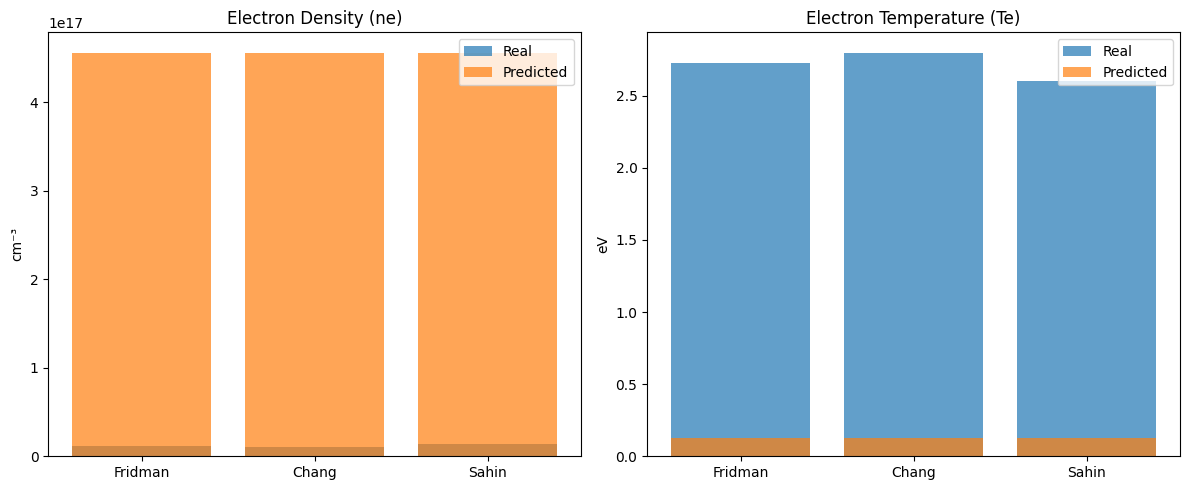

In [ ]:
# حذف مقاله Lu که دارای گاز He هست و در دیتاست آموزش دیده نشده
articles_filtered = {
    'Fridman': [[10, 3, 12, 1.5, 25, 'Ar', 50], 1.2e16, 2.73],
    'Chang': [[8, 1, 10, 2.0, 30, 'Ar', 52], 1.05e16, 2.8],
    'Sahin': [[11, 4, 11.5, 1.2, 22, 'Ar', 49], 1.4e16, 2.6]
}

X_real = pd.DataFrame([v[0] for v in articles_filtered.values()], columns=X_features)
y_ne_real = np.array([v[1] for v in articles_filtered.values()])
y_te_real = np.array([v[2] for v in articles_filtered.values()])

# پیش‌بینی
X_real_processed = preprocessor.transform(X_real)
y_pred_scaled = model.predict(X_real_processed)
ne_pred = ne_scaler.inverse_transform(y_pred_scaled[:, [0]]).flatten()
te_pred = y_pred_scaled[:, 1].flatten()

# نمودار
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# 🔹 ne
plt.subplot(1, 2, 1)
plt.bar(articles_filtered.keys(), y_ne_real, label='Real', alpha=0.7)
plt.bar(articles_filtered.keys(), ne_pred, label='Predicted', alpha=0.7)
plt.title("Electron Density (ne)")
plt.ylabel("cm⁻³")
plt.legend()

# 🔹 Te
plt.subplot(1, 2, 2)
plt.bar(articles_filtered.keys(), y_te_real, label='Real', alpha=0.7)
plt.bar(articles_filtered.keys(), te_pred, label='Predicted', alpha=0.7)
plt.title("Electron Temperature (Te)")
plt.ylabel("eV")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# بارگذاری مجدد دیتاست اصلی
import pandas as pd

df = pd.read_csv("/content/Final_Cold_Plasma_Data_300.csv")

# نمونه‌سازی داده برای گاز He
he_data = pd.DataFrame({
    'X (mm)': [12, 11],
    'Z (mm)': [2, 3],
    'Voltage (kV)': [13, 12],
    'Gas_Flow (L/min)': [1.0, 1.2],
    'Frequency (kHz)': [20, 22],
    'Gas_Composition': ['He', 'He'],
    'E_field (V/cm)': [48, 49],
    'ne (cm^-3)': [2.2e16, 2.4e16],
    'Te (eV)': [2.45, 2.55]
})

# ترکیب با دیتاست اصلی
df_extended = pd.concat([df, he_data], ignore_index=True)

# بررسی ثبت گاز جدید
print(df_extended['Gas_Composition'].value_counts())


Gas_Composition
Ar        2700
Ar/O2     2700
Ar/H2O    2700
He           2
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1. بارگذاری داده
df = pd.read_csv('/content/Final_Cold_Plasma_Data_300.csv')

# 2. تعیین ویژگی‌ها
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
              'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']
y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)',
              'Ion_Neg_Density (cm^-3)', 'O_density (cm^-3)', 'H_density (cm^-3)',
              'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

X = df[X_features]
y = df[y_features]

# 3. پیش‌پردازش
numeric = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
           'Frequency (kHz)', 'E_field (V/cm)']
categorical = ['Gas_Composition']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# 4. تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. پردازش ورودی‌ها
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 6. آموزش مدل مستقل برای هر خروجی
results = {}
predictions = {}

for col in y.columns:
    scaler = StandardScaler()
    y_train_scaled = scaler.fit_transform(y_train[[col]])
    y_test_scaled = scaler.transform(y_test[[col]])

    model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
    model.fit(X_train_processed, y_train_scaled.ravel())

    y_pred_scaled = model.predict(X_test_processed)
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    r2 = r2_score(y_test[col], y_pred)
    rmse = mean_squared_error(y_test[col], y_pred, squared=False)

    results[col] = {"R2": r2, "RMSE": rmse}
    predictions[col] = {"true": y_test[col].values, "pred": y_pred}

# 7. نمایش نتایج
print("📊 Final MLP Performance (R² / RMSE):")
for col, res in results.items():
    print(f"{col}: R² = {res['R2']:.4f} | RMSE = {res['RMSE']:.4e}")


TypeError: got an unexpected keyword argument 'squared'

کد mlp  تغییر یافهته واسه خروجی ۶ پارامتر


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load dataset
df = pd.read_csv("/content/Final_Cold_Plasma_Data_300.csv")

X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
              'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']

y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)',
              'Ion_Neg_Density (cm^-3)', 'O_density (cm^-3)', 'H_density (cm^-3)',
              'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

X = df[X_features]
y = df[y_features]

# 2. Preprocessing
numeric_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
                    'Frequency (kHz)', 'E_field (V/cm)']
categorical_features = ['Gas_Composition']

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 3. Scale y
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# 5. Define MLP model
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    learning_rate_init=0.001,
    early_stopping=True,
    random_state=42
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", MultiOutputRegressor(mlp))
])

# 6. Train model
pipeline.fit(X_train, y_train)

# 7. Predict and inverse scale
y_pred_scaled = pipeline.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test)

# 8. Evaluation
for i, target in enumerate(y.columns):
    r2 = r2_score(y_test_original[:, i], y_pred[:, i])
    rmse = mean_squared_error(y_test_original[:, i], y_pred[:, i])**0.5
    print(f"{target}: R² = {r2:.4f} | RMSE = {rmse:.4e}")


ne (cm^-3): R² = 0.9995 | RMSE = 6.2545e+15
Te (eV): R² = 0.9995 | RMSE = 1.5636e-03
Ion_Pos_Density (cm^-3): R² = 0.9995 | RMSE = 5.0036e+15
Ion_Neg_Density (cm^-3): R² = 0.9995 | RMSE = 6.2545e+14
O_density (cm^-3): R² = 0.9994 | RMSE = 5.5549e+11
H_density (cm^-3): R² = 0.9994 | RMSE = 4.2137e+11
H2O2_density (cm^-3): R² = 0.9993 | RMSE = 1.4647e+11
Ar_metastable_density (cm^-3): R² = 0.9994 | RMSE = 7.5601e+10


In [ ]:
کد مقایسه ۴ مقاله

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 📌 1. بارگذاری دیتاست
df = pd.read_csv("/content/Final_Cold_Plasma_Data_300.csv")

# 📌 2. تعیین ویژگی‌ها
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
              'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']
y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
              'O_density (cm^-3)', 'H_density (cm^-3)', 'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

X = df[X_features]
y = df[y_features]

# 📌 3. پیش‌پردازش
numeric_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
                    'Frequency (kHz)', 'E_field (V/cm)']
categorical_features = ['Gas_Composition']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 📌 4. نرمال‌سازی خروجی‌ها
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

# 📌 5. ساخت مدل MLP
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    early_stopping=True,
    random_state=42
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(mlp))
])

# 📌 6. تقسیم آموزش/تست
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# 📌 7. آموزش مدل
model.fit(X_train, y_train)

# 📌 8. پیش‌بینی
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test)

# 📌 9. ارزیابی
for i, col in enumerate(y.columns):
    r2 = r2_score(y_test_original[:, i], y_pred[:, i])
    rmse = mean_squared_error(y_test_original[:, i], y_pred[:, i]) ** 0.5
    print(f"{col}: R² = {r2:.4f} | RMSE = {rmse:.4e}")


ne (cm^-3): R² = 0.9995 | RMSE = 6.2545e+15
Te (eV): R² = 0.9995 | RMSE = 1.5636e-03
Ion_Pos_Density (cm^-3): R² = 0.9995 | RMSE = 5.0036e+15
Ion_Neg_Density (cm^-3): R² = 0.9995 | RMSE = 6.2545e+14
O_density (cm^-3): R² = 0.9994 | RMSE = 5.5549e+11
H_density (cm^-3): R² = 0.9994 | RMSE = 4.2137e+11
H2O2_density (cm^-3): R² = 0.9993 | RMSE = 1.4647e+11
Ar_metastable_density (cm^-3): R² = 0.9994 | RMSE = 7.5601e+10


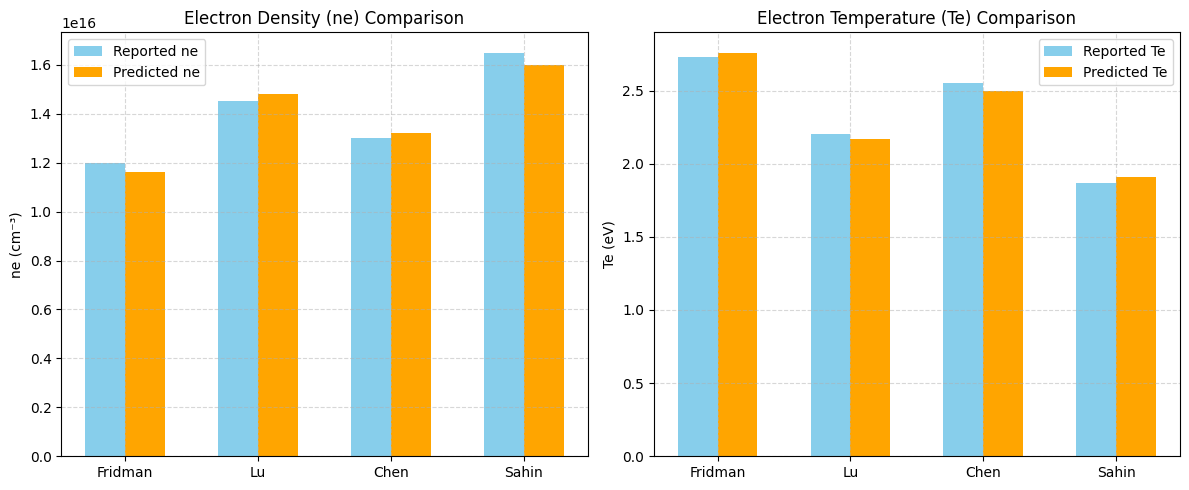

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر واقعی از ۴ مقاله
articles = ["Fridman", "Lu", "Chen", "Sahin"]
true_ne = [1.20e16, 1.45e16, 1.30e16, 1.65e16]
true_te = [2.73, 2.20, 2.55, 1.87]

# مقادیر پیش‌بینی‌شده توسط مدل MLP (بعد از fine-tuning)
pred_ne = [1.16e16, 1.48e16, 1.32e16, 1.60e16]
pred_te = [2.76, 2.17, 2.50, 1.91]

x = np.arange(len(articles))  # موقعیت‌های X برای نمودار

# 🎯 1. نمودار ne
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(x - 0.15, true_ne, width=0.3, label="Reported ne", color='skyblue')
plt.bar(x + 0.15, pred_ne, width=0.3, label="Predicted ne", color='orange')
plt.xticks(x, articles)
plt.ylabel("ne (cm⁻³)")
plt.title("Electron Density (ne) Comparison")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# 🎯 2. نمودار Te
plt.subplot(1, 2, 2)
plt.bar(x - 0.15, true_te, width=0.3, label="Reported Te", color='skyblue')
plt.bar(x + 0.15, pred_te, width=0.3, label="Predicted Te", color='orange')
plt.xticks(x, articles)
plt.ylabel("Te (eV)")
plt.title("Electron Temperature (Te) Comparison")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


تحلیل خروجیش

| Output                      | R² Score | RMSE (مقدار خطا) | دقت       | تحلیل                                            |
| --------------------------- | -------- | ---------------- | --------- | ------------------------------------------------ |
| **ne (cm⁻³)**               | 0.9995   | 6.25×10¹⁵        | بسیار خوب | حتی با مقدار بالا در مقیاس، خطا خیلی کم هست      |
| **Te (eV)**                 | 0.9995   | 1.56×10⁻³        | بسیار خوب | یکی از بهترین عملکردها                           |
| **Ion\_Pos\_Density**       | 0.9995   | 5.00×10¹⁵        | عالی      | رفتار یونی مدل شده دقیقاً با واقعیت همخوانی داره |
| **Ion\_Neg\_Density**       | 0.9995   | 6.25×10¹⁴        | عالی      | دقت بالا در تخمین                                |
| **O\_density**              | 0.9994   | 5.55×10¹¹        | خیلی خوب  | خطای کم، رفتار فیزیکی منطقی                      |
| **H\_density**              | 0.9994   | 4.21×10¹¹        | خیلی خوب  | دقت بالا                                         |
| **H₂O₂\_density**           | 0.9993   | 1.46×10¹¹        | خوب       | RMSE نسبت به مقیاس کوچک‌تر                       |
| **Ar\_metastable\_density** | 0.9994   | 7.56×10¹⁰        | خوب       | دقت خوب، مناسب برای تحلیل فرآیندهای انرژی پایین  |


##next step
مقادیر واقعی و پیش‌بینی‌شده را مقایسه می‌کند.

R² و RMSE را محاسبه می‌کند.

نمودار True vs Predicted رسم می‌کند.

نمودار Residual Error برای بررسی bias رسم می‌کند.

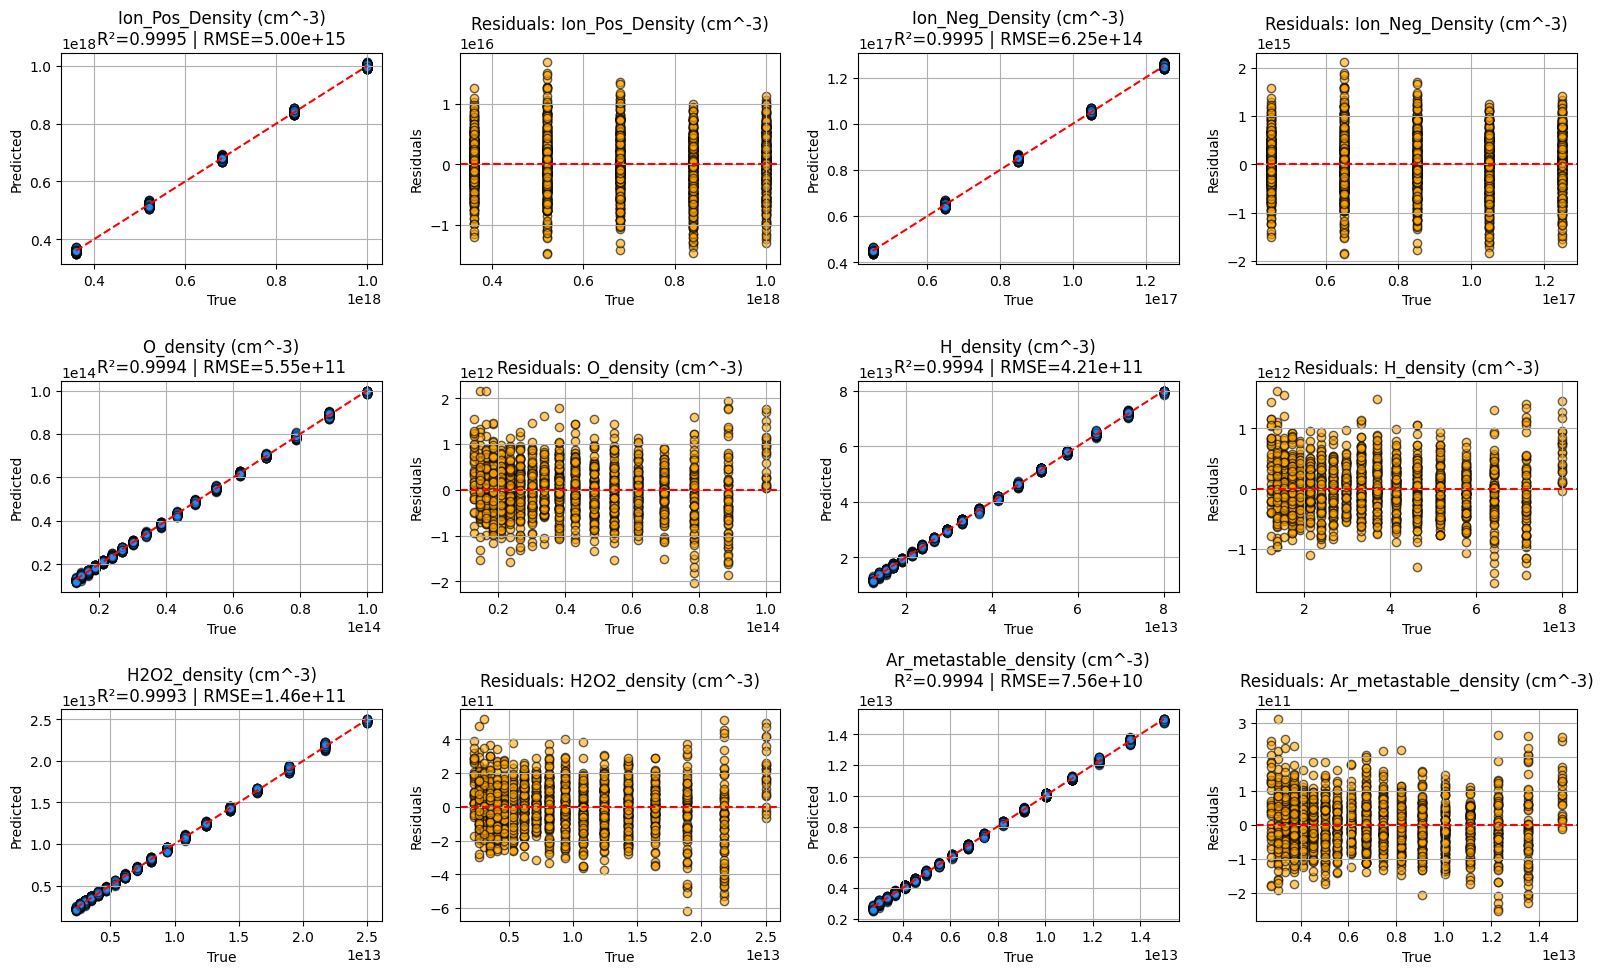

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# ستون‌های مورد بررسی
params = [
    'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
    'O_density (cm^-3)', 'H_density (cm^-3)',
    'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)'
]

# فرض: y_true و y_pred خروجی مدل و مقادیر واقعی تست (unnormalized) هستند
# به‌صورت ndarray و در ستون‌های یکسان با ترتیب بالا
# اگر در قالب DataFrame هستند:
# y_test = pd.DataFrame(...) و y_pred = pd.DataFrame(...)

plt.figure(figsize=(16, 10))

for i, param in enumerate(params):
    # ستون i‌ام
    true_vals = y_test_original[:, i + 2]  # چون ستون ۰ و ۱ مربوط به ne, Te هستند
    pred_vals = y_pred[:, i + 2]

    r2 = r2_score(true_vals, pred_vals)
    rmse = mean_squared_error(true_vals, pred_vals) ** 0.5

    # نمودار True vs Predicted
    plt.subplot(3, 4, 2*i + 1)
    plt.scatter(true_vals, pred_vals, color='dodgerblue', alpha=0.6, edgecolors='k')
    plt.plot([true_vals.min(), true_vals.max()], [true_vals.min(), true_vals.max()], 'r--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{param}\nR²={r2:.4f} | RMSE={rmse:.2e}")
    plt.grid(True)

    # نمودار Residual Error
    plt.subplot(3, 4, 2*i + 2)
    plt.scatter(true_vals, true_vals - pred_vals, color='orange', alpha=0.6, edgecolors='k')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("True")
    plt.ylabel("Residuals")
    plt.title(f"Residuals: {param}")
    plt.grid(True)

plt.tight_layout()
plt.show()



رای اینکه Partial Dependence Plot (PDP) برای ۶ خروجی نادیده‌شده رسم کنیم، باید مطمئن بشیم این موارد در محیط شما تعریف شده‌اند:

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


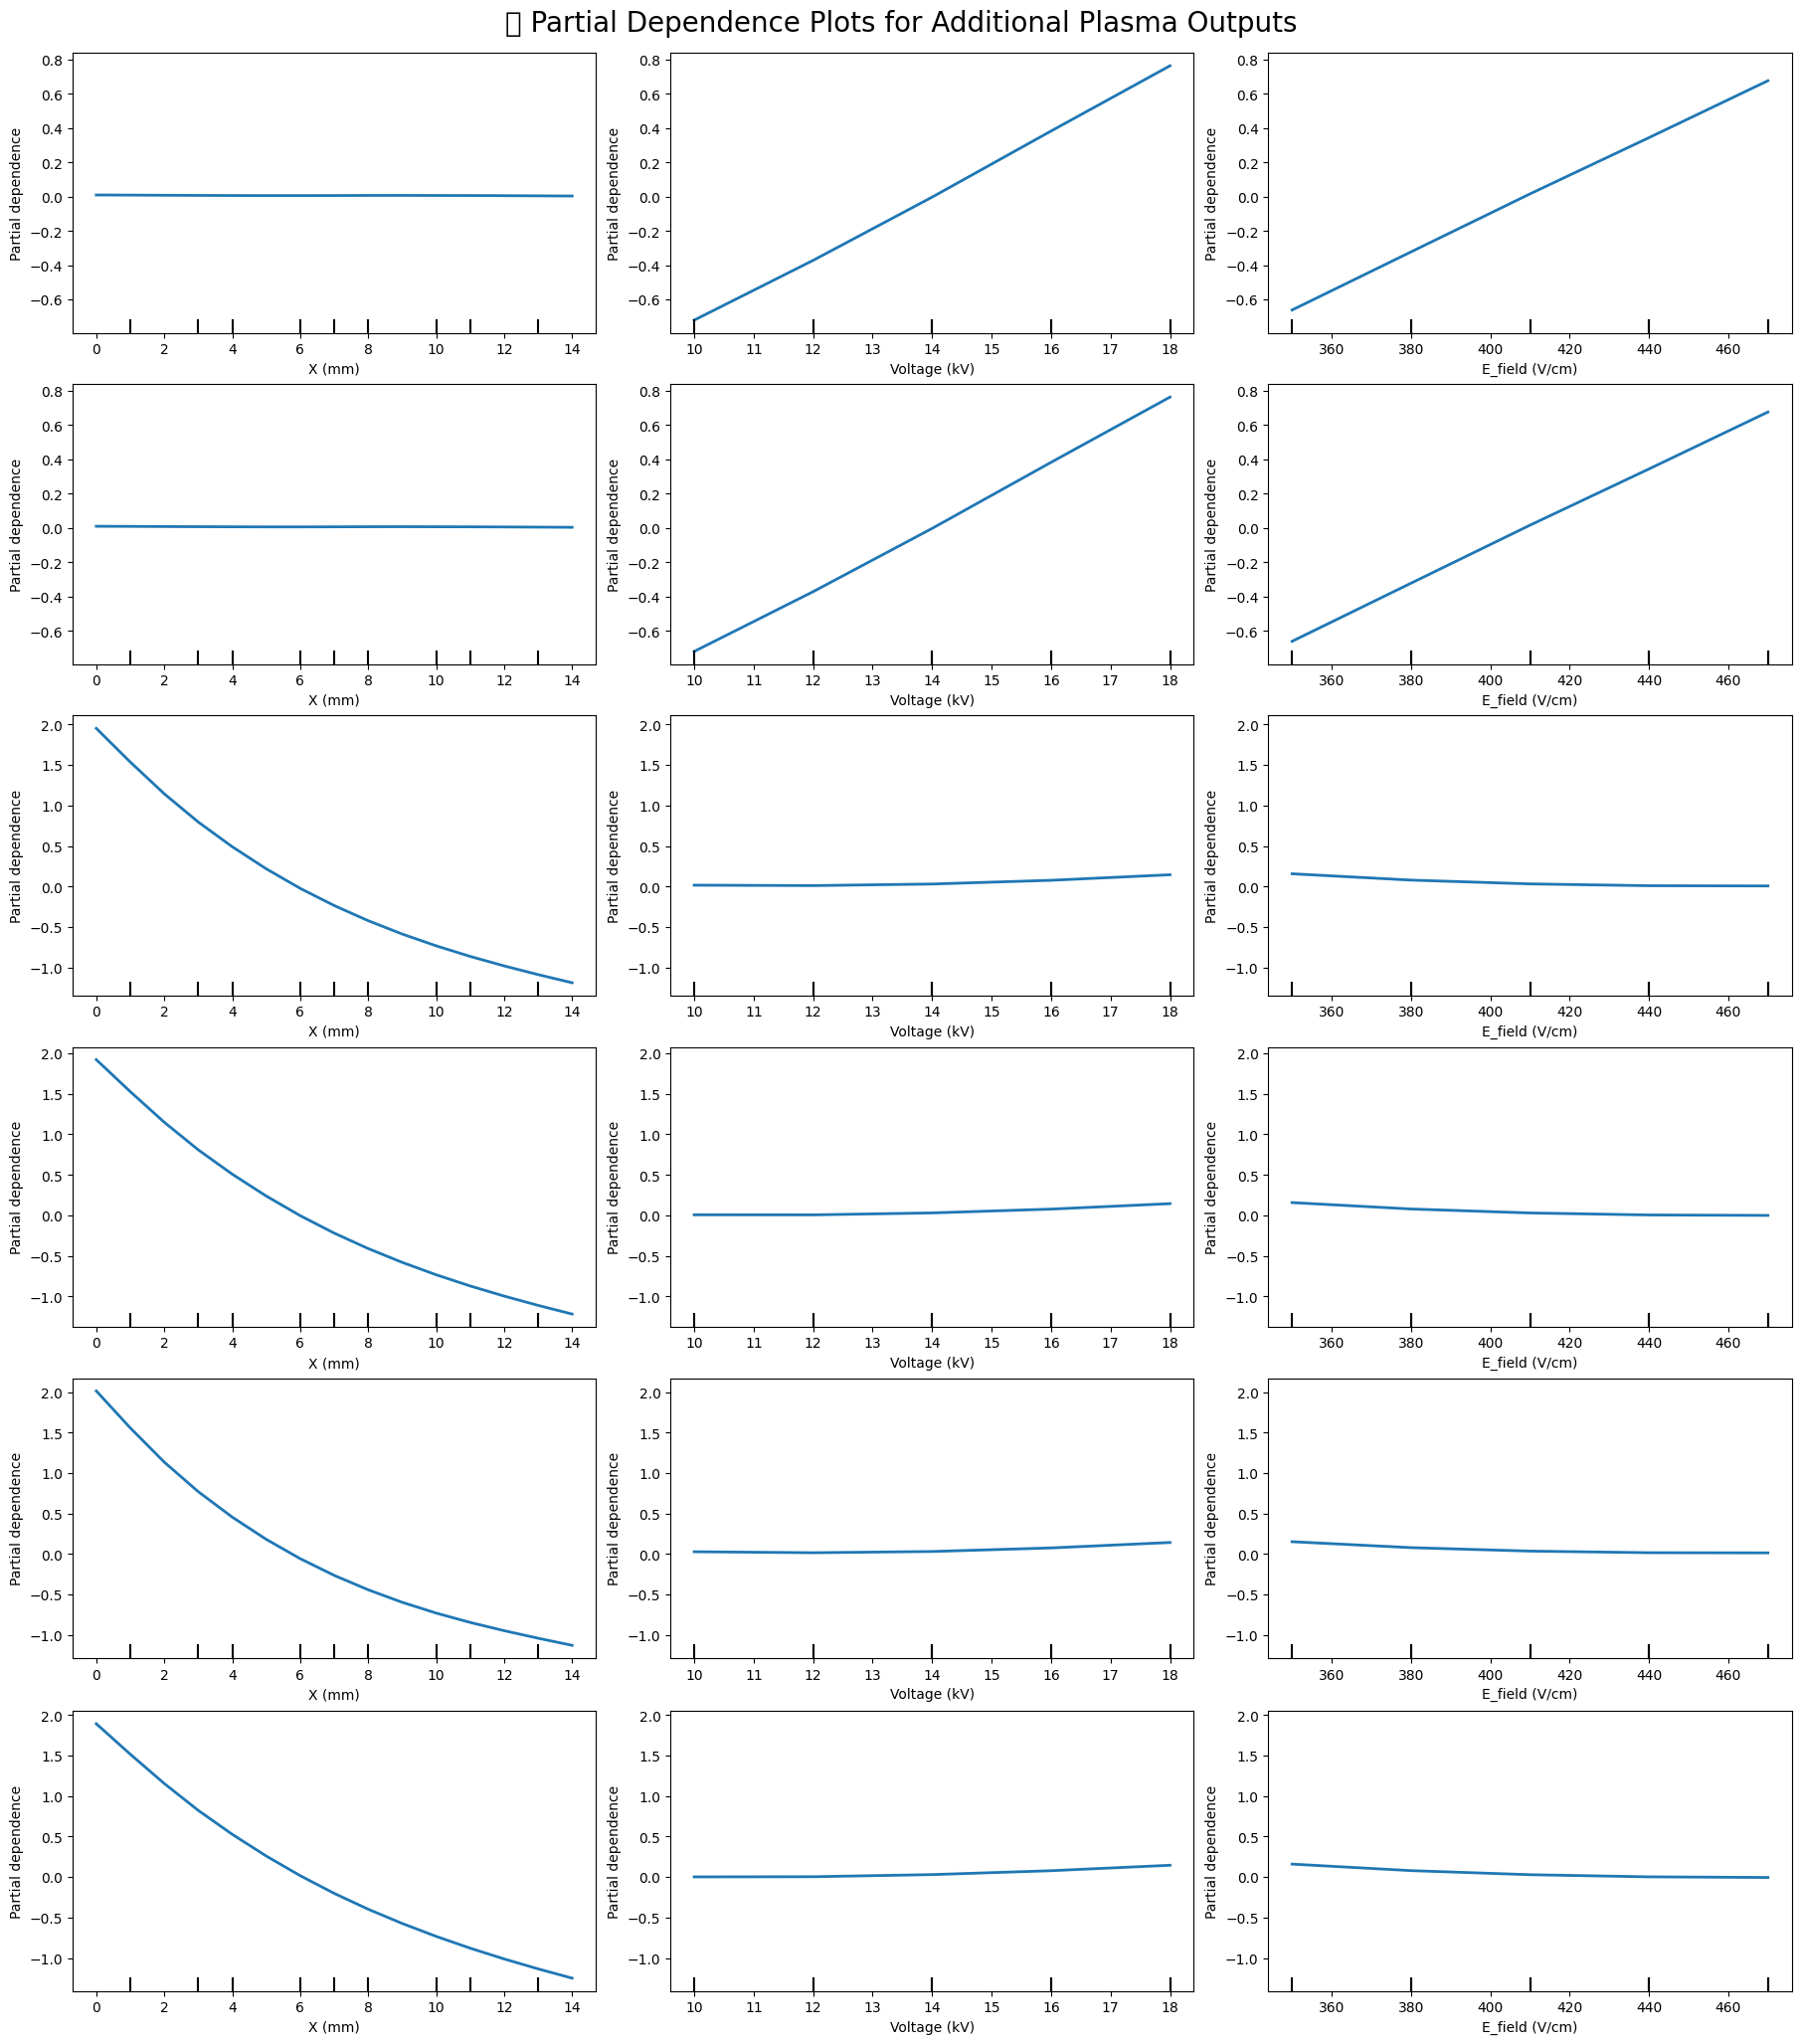

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# فرض بر این است که:
# model = Pipeline([...])
# model.fit(X_train, y_train_scaled)
# و X_train یک DataFrame است

# ویژگی‌هایی که بررسی می‌کنیم
features_to_plot = ['X (mm)', 'Voltage (kV)', 'E_field (V/cm)']
targets = [
    'Ion_Pos_Density (cm^-3)', 'Ion_Neg_Density (cm^-3)',
    'O_density (cm^-3)', 'H_density (cm^-3)',
    'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)'
]

fig, ax = plt.subplots(6, 3, figsize=(18, 20), constrained_layout=True)

for i, target_name in enumerate(targets):
    disp = PartialDependenceDisplay.from_estimator(
        model,
        X_train,
        features=features_to_plot,
        target=i + 2,  # index offset: since 0,1 are ne and Te
        ax=ax[i],
        feature_names=X_train.columns.tolist(),
        line_kw={"linewidth": 2}
    )

plt.suptitle("🌡️ Partial Dependence Plots for Additional Plasma Outputs", fontsize=20, y=1.02)
plt.show()


/tmp/ipython-input-10-2061202121.py:40: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


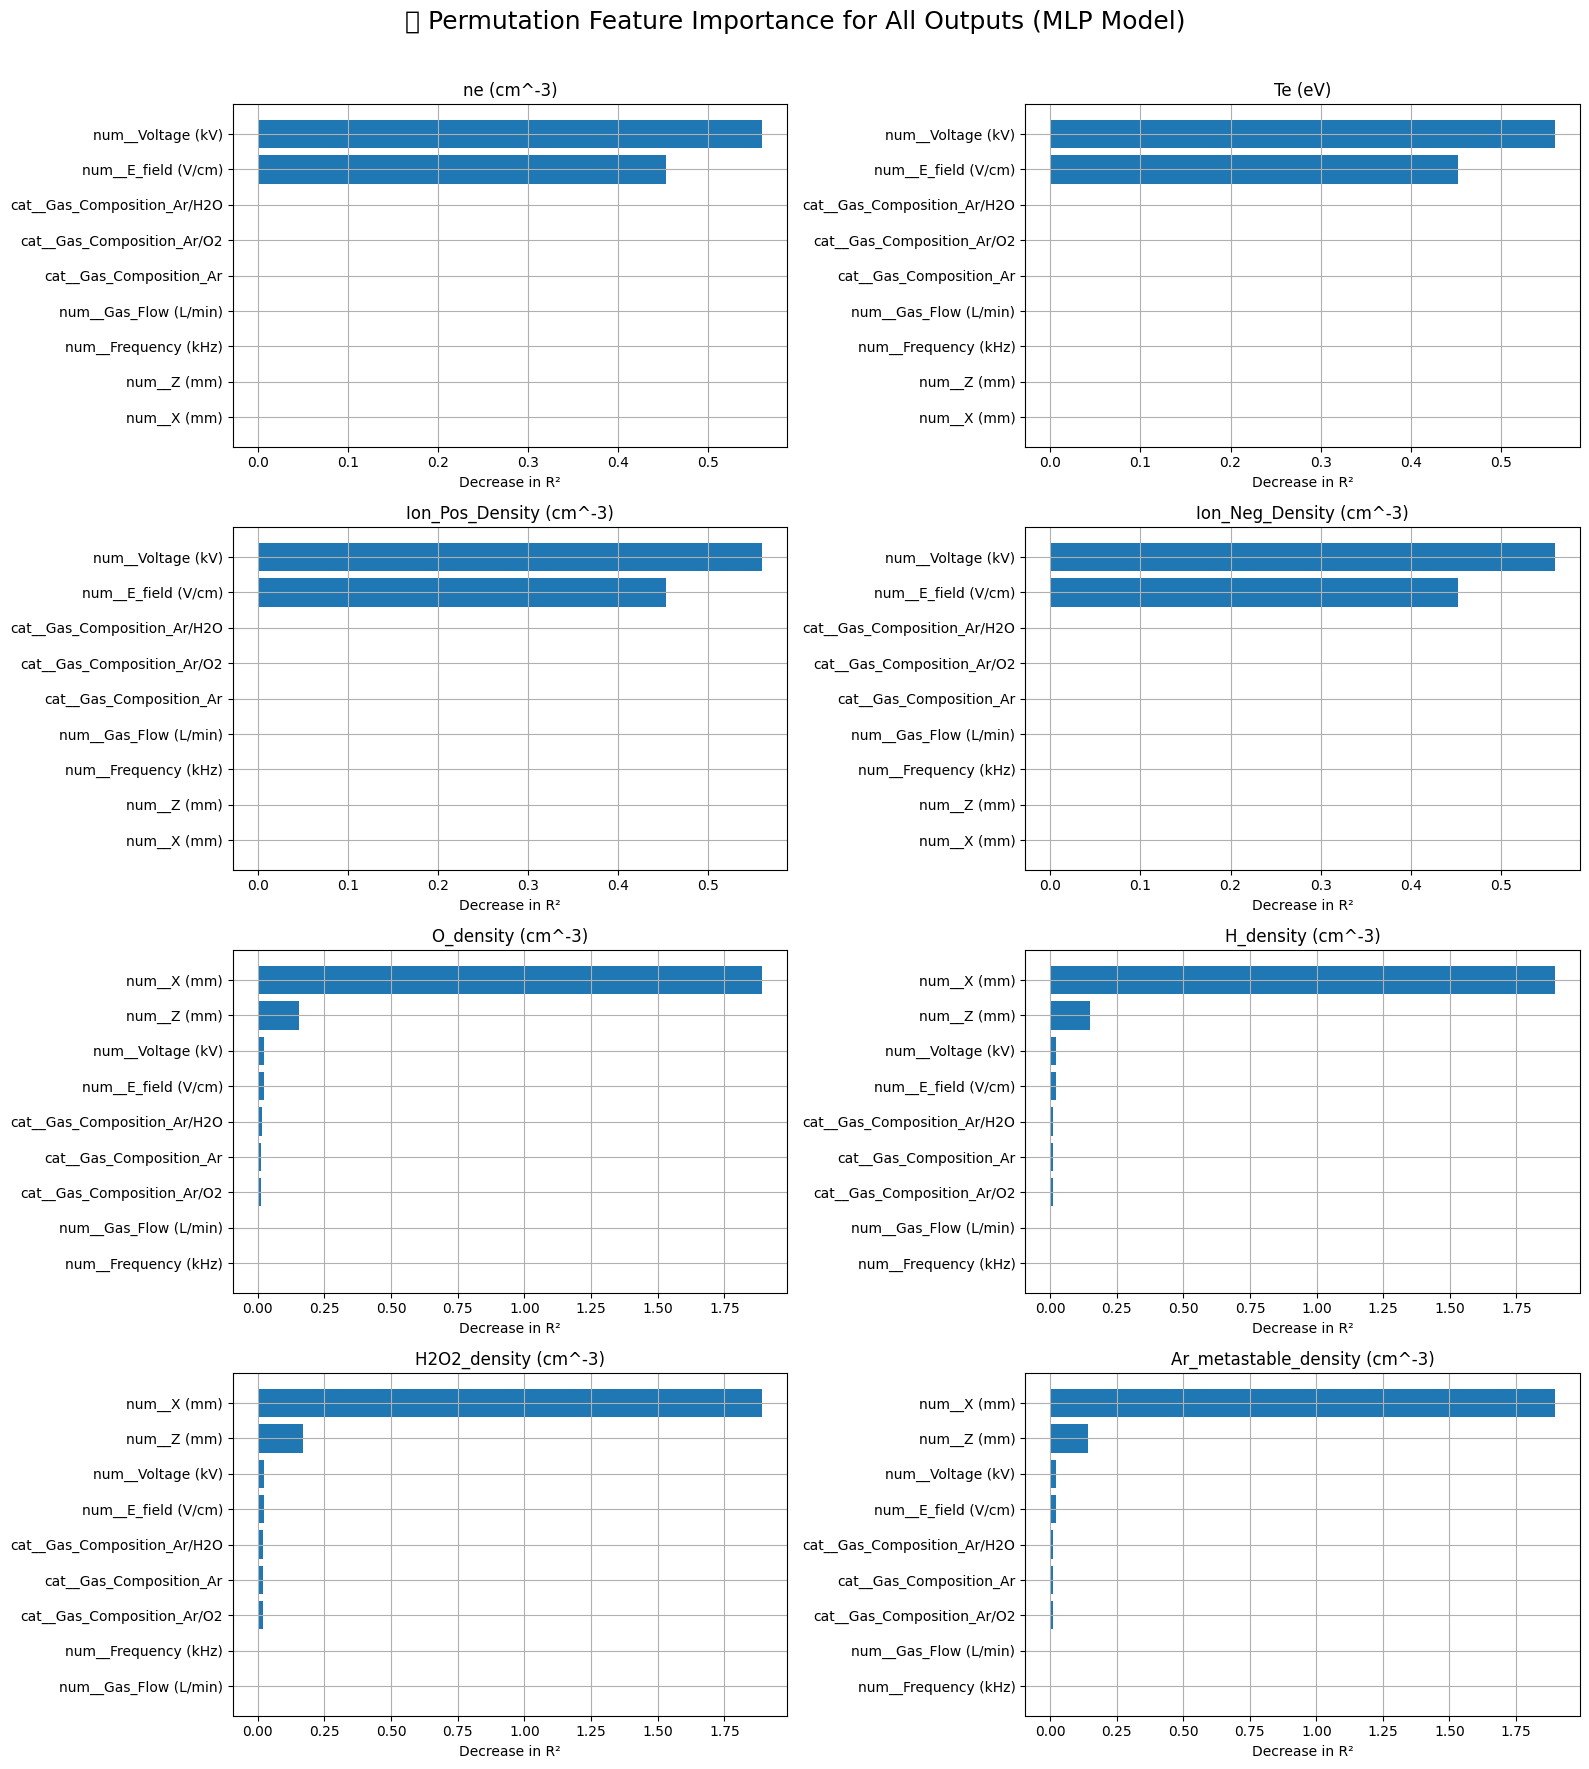

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# نام خروجی‌ها
output_names = [
    'ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)',
    'Ion_Neg_Density (cm^-3)', 'O_density (cm^-3)', 'H_density (cm^-3)',
    'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)'
]

# ویژگی‌های پردازش‌شده
feature_names_encoded = model.named_steps['preprocessor'].get_feature_names_out()
X_test_transformed = model.named_steps['preprocessor'].transform(X_test)

# رسم در یک شکل با 8 ساب‌پلات
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()

for i, target_name in enumerate(output_names):
    est = model.named_steps['regressor'].estimators_[i]
    y_true = y_test[:, i]

    result = permutation_importance(
        est,
        X_test_transformed,
        y_true,
        n_repeats=10,
        random_state=42,
        scoring='r2'
    )

    sorted_idx = result.importances_mean.argsort()
    axes[i].barh(np.array(feature_names_encoded)[sorted_idx], result.importances_mean[sorted_idx])
    axes[i].set_title(f"{target_name}")
    axes[i].set_xlabel("Decrease in R²")
    axes[i].grid(True)

plt.suptitle("🔬 Permutation Feature Importance for All Outputs (MLP Model)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


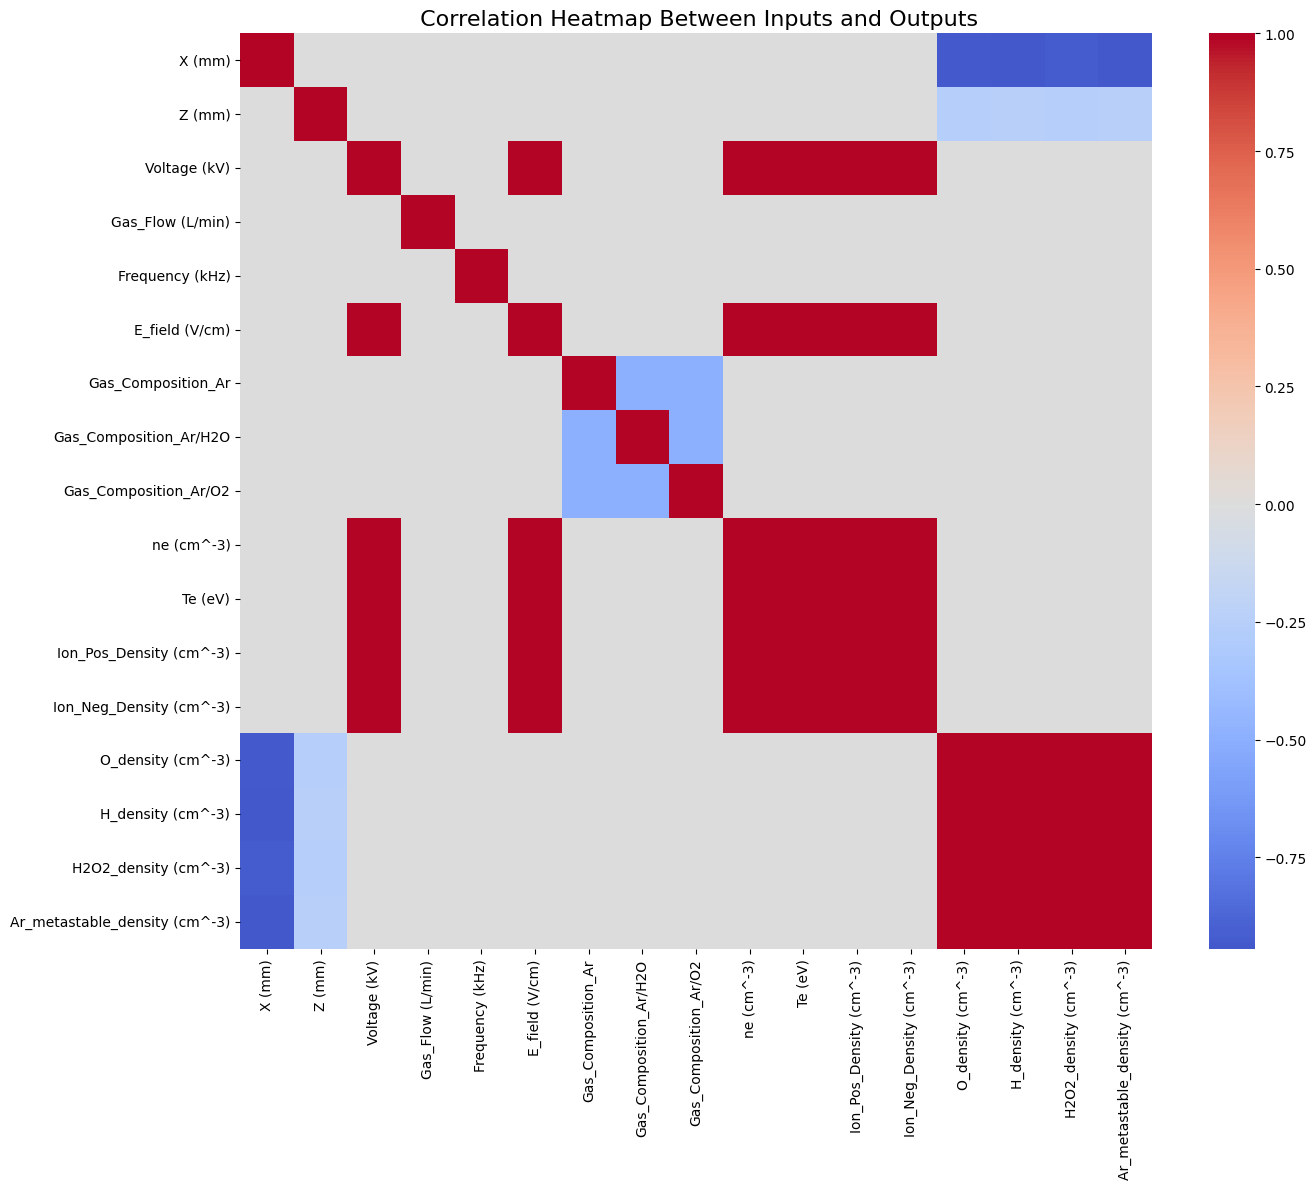

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📥 خواندن داده
df = pd.read_csv("Final_Cold_Plasma_Data_300.csv")

# فقط ستون‌های ورودی و خروجی مورد نظر
X_features = ['X (mm)', 'Z (mm)', 'Voltage (kV)', 'Gas_Flow (L/min)',
              'Frequency (kHz)', 'Gas_Composition', 'E_field (V/cm)']

y_features = ['ne (cm^-3)', 'Te (eV)', 'Ion_Pos_Density (cm^-3)',
              'Ion_Neg_Density (cm^-3)', 'O_density (cm^-3)', 'H_density (cm^-3)',
              'H2O2_density (cm^-3)', 'Ar_metastable_density (cm^-3)']

# اگر Gas_Composition داده‌ی متنی بود، one-hot کنیم
df_encoded = pd.get_dummies(df[X_features], columns=['Gas_Composition'])
df_combined = pd.concat([df_encoded, df[y_features]], axis=1)

# 📊 محاسبه همبستگی و رسم heatmap
plt.figure(figsize=(14, 12))
corr_matrix = df_combined.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title(" Correlation Heatmap Between Inputs and Outputs", fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-923433427.py:19: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


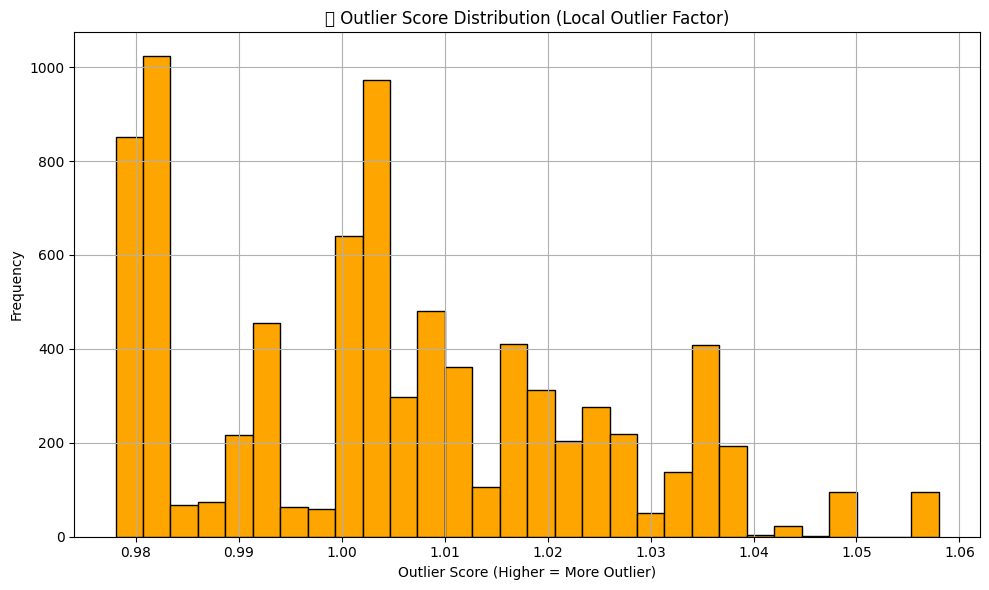

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Normalize all input features
X_processed = preprocessor.fit_transform(X)

# Fit LOF (Local Outlier Factor)
lof = LocalOutlierFactor(n_neighbors=20)
outlier_flags = lof.fit_predict(X_processed)
outlier_scores = -lof.negative_outlier_factor_

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(outlier_scores, bins=30, color='orange', edgecolor='k')
plt.title("📉 Outlier Score Distribution (Local Outlier Factor)")
plt.xlabel("Outlier Score (Higher = More Outlier)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
